# Importing Neccessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashut\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Loading neccessary databases

In [2]:
i3=pd.read_csv("Data\intel_i3.csv")
i5=pd.read_csv("Data\intel_i5.csv")
i7=pd.read_csv("Data\intel_i7.csv")
i9=pd.read_csv("Data\intel_i9.csv")
all_core=pd.read_csv("Data\intel_all_core.csv")

# Exploratory Data Analysis on Core i3 Gen-12,13 and 14

## Analysis ratings_score Columns

In [3]:
i3.head()

country  ratingScore                                  reviewDescription   
0   India            1  Cpu stock cooler fan got broken with 1 blade i...  \
1   India            1  The Processor is Good & Works Fine. But The De...   
2   India            4                                Performance is good   
3   India            5  If you would be building pc just for gaming an...   
4   India            5  This is one of the best cpu in budget if you o...   

                                         reviewTitle        Model Core  
0                                cpu with broken fan  i3 12th Gen   i3  
1                        Good Cpu but awful Delivery  i3 12th Gen   i3  
2                                               Good  i3 12th Gen   i3  
3  This is the best you'll get in this price rang...  i3 12th Gen   i3  
4                                            Awesome  i3 12th Gen   i3

In [4]:
#Column Names
print(f"Feature names : {i3.columns.values}")

Feature names : ['country' 'ratingScore' 'reviewDescription' 'reviewTitle' 'Model' 'Core']


In [5]:
#Checking for null values
i3.isnull().sum()

country              0
ratingScore          0
reviewDescription    0
reviewTitle          0
Model                0
Core                 0
dtype: int64

In [6]:
#Dataset shape
print(f"Dataset shape : {i3.shape}")

Dataset shape : (25, 6)


In [7]:
#Datatypes of columns
i3.dtypes

country              object
ratingScore           int64
reviewDescription    object
reviewTitle          object
Model                object
Core                 object
dtype: object

In [8]:
#Number of reviews
len(i3)

25

In [9]:
#Number of reviews per star
print(f"Rating value count: \n{i3['ratingScore'].value_counts()}")

Rating value count: 
ratingScore
5    20
1     2
3     2
4     1
Name: count, dtype: int64


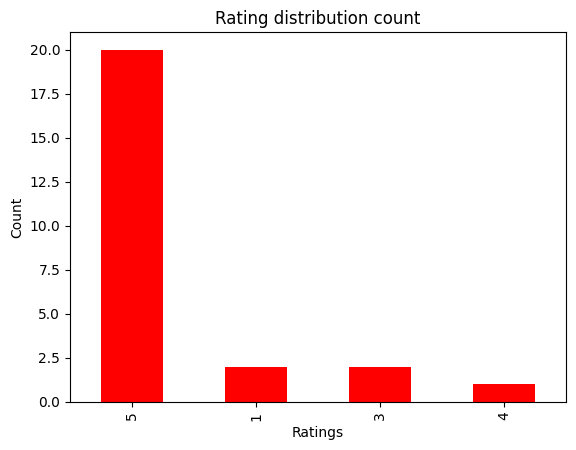

In [10]:
#Bar plot to visualize the total counts of each rating

i3['ratingScore'].value_counts().plot.bar(color = 'red')
plt.title('Rating distribution count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [11]:
#Finding the percentage distribution of each rating
print(f"Rating value count - percentage distribution: \n{round(i3['ratingScore'].value_counts()/i3.shape[0]*100,2)}")

Rating value count - percentage distribution: 
ratingScore
5    80.0
1     8.0
3     8.0
4     4.0
Name: count, dtype: float64


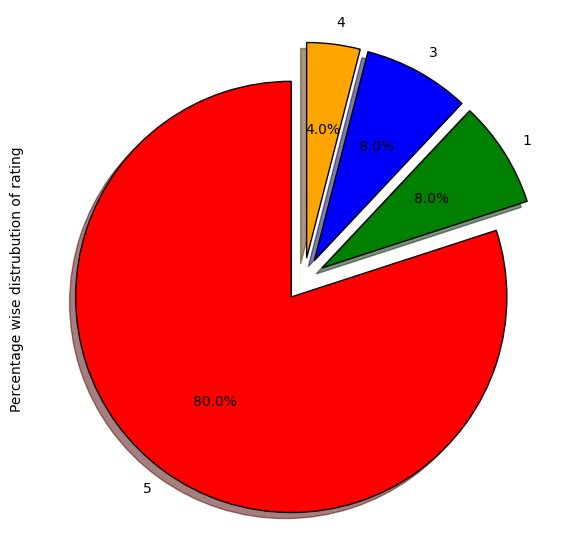

In [12]:
#Graphical representation of percentage data
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green', 'blue','orange')
wp = {'linewidth':1, "edgecolor":'black'}
tags = i3['ratingScore'].value_counts()/i3.shape[0]
explode=(0.1,0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of rating')
from io import  BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")

## Analysis Model Column

In [13]:
#Distinct values of 'Model' and its count

print(f"Model value count: \n{i3['Model'].value_counts()}")

Model value count: 
Model
i3 12th Gen    20
i3 14th Gen     4
i3 13th Gen     1
Name: count, dtype: int64


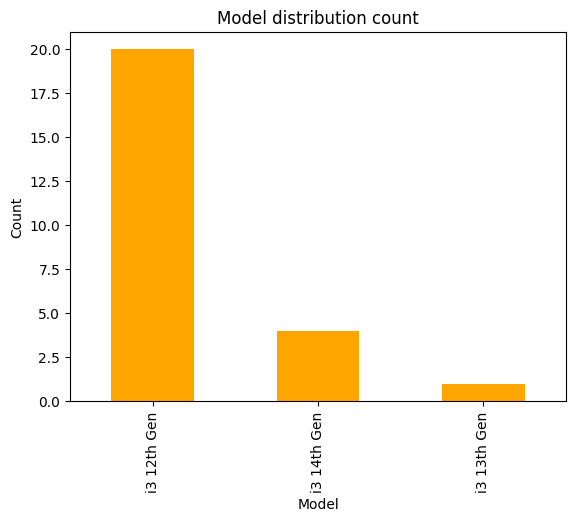

In [14]:
#Bar graph to visualize the total counts of each Model

i3['Model'].value_counts().plot.bar(color = 'orange')
plt.title('Model distribution count')
plt.xlabel('Model')
plt.ylabel('Count')
plt.show()

In [15]:
#Finding the percentage distribution of each variation

print(f"Variation value count - percentage distribution: \n{round(i3['Model'].value_counts()/i3.shape[0]*100,2)}")

Variation value count - percentage distribution: 
Model
i3 12th Gen    80.0
i3 14th Gen    16.0
i3 13th Gen     4.0
Name: count, dtype: float64


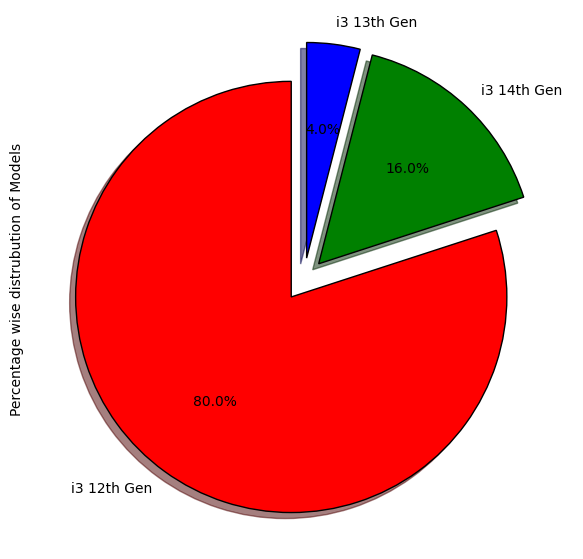

In [16]:
#Graphical representation of percentage data
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green', 'blue')
wp = {'linewidth':1, "edgecolor":'black'}
tags = i3['Model'].value_counts()/i3.shape[0]
explode=(0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of Models')
from io import  BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")

In [17]:
#Mean rating of each model
i3.groupby('Model')['ratingScore'].mean()

Model
i3 12th Gen    4.35
i3 13th Gen    5.00
i3 14th Gen    5.00
Name: ratingScore, dtype: float64

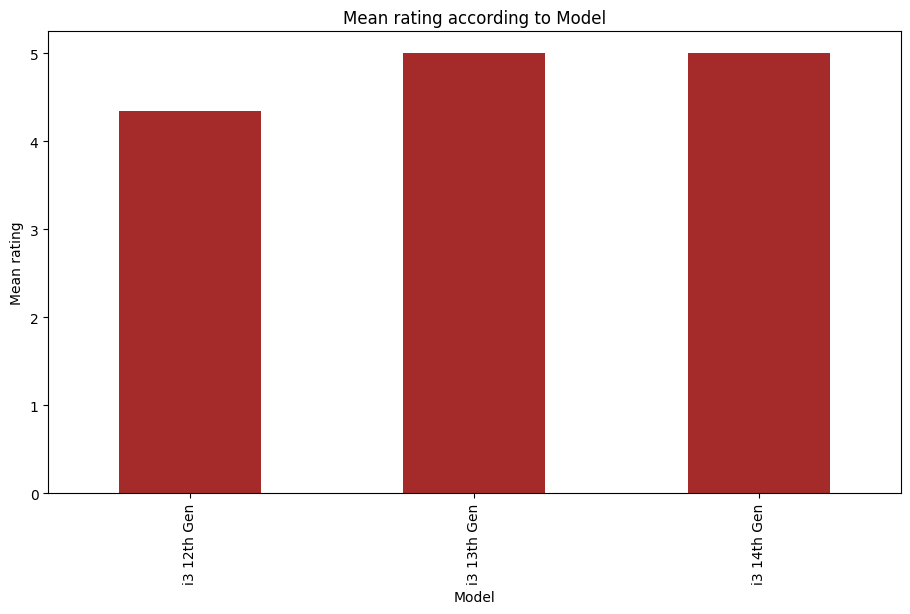

In [18]:
i3.groupby('Model')['ratingScore'].mean().sort_values().plot.bar(color = 'brown', figsize=(11, 6))
plt.title("Mean rating according to Model")
plt.xlabel('Model')
plt.ylabel('Mean rating')
plt.show()

## Analysing reviewDescription Column

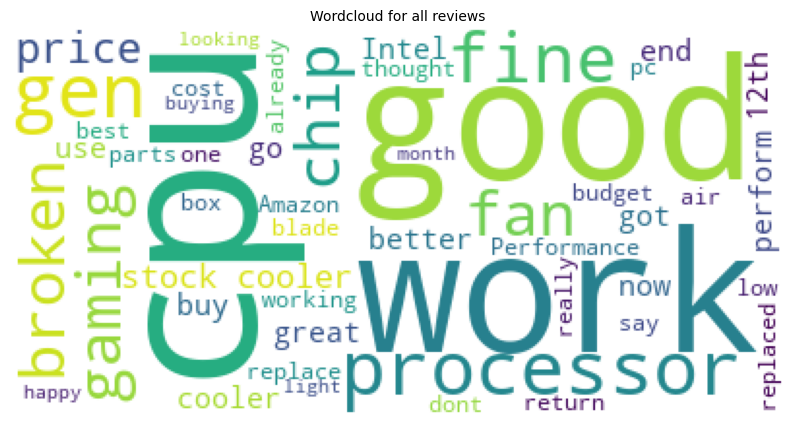

In [19]:
#Generating World Cloud Of Most Common Words used in reviews
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(i3.reviewDescription)
reviews = " ".join([review for review in i3['reviewDescription']])
wc = WordCloud(background_color='white', max_words=50)
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

## Analysing reviewTitle Column

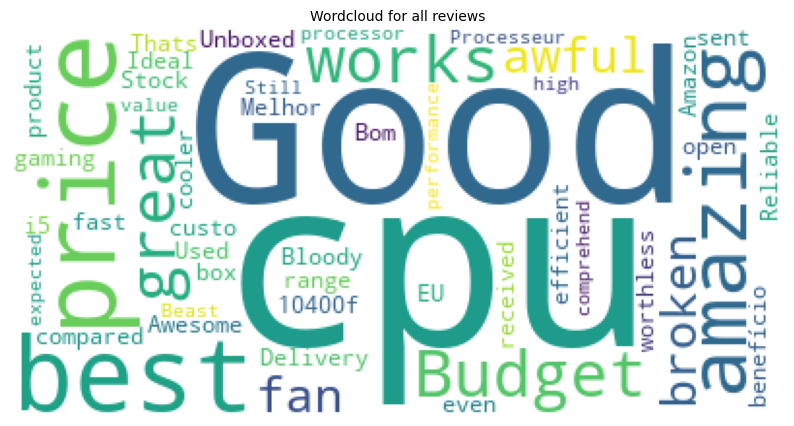

In [20]:
#Generating World Cloud Of Most Common Words used in reviews titles
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(i3.reviewTitle)
reviews = " ".join([review for review in i3['reviewTitle']])
wc = WordCloud(background_color='white', max_words=50)
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

## Analysing the country Column

In [21]:
#Number of reviews per country
print(f"Rating value count: \n{i3['country'].value_counts()}")

Rating value count: 
country
India             7
United Kingdom    7
United States     4
Brazil            2
Germany           2
Australia         2
France            1
Name: count, dtype: int64


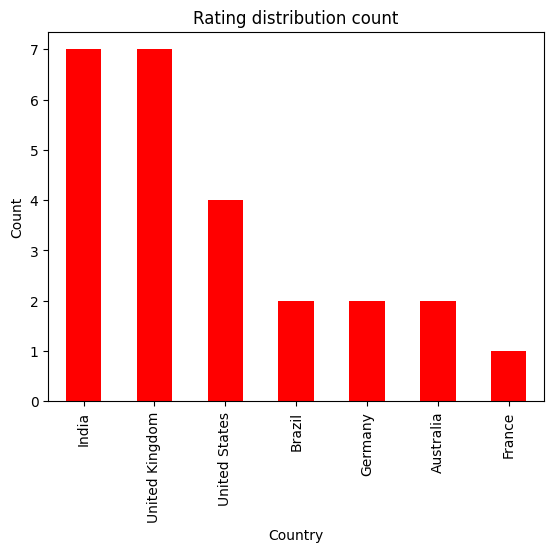

In [22]:
#Bar plot to visualize the total counts of rating per country

i3['country'].value_counts().plot.bar(color = 'red')
plt.title('Rating distribution count')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

In [23]:
#Finding the percentage distribution of each coutry

print(f"Variation value count - percentage distribution: \n{round(i3['country'].value_counts()/i3.shape[0]*100,2)}")

Variation value count - percentage distribution: 
country
India             28.0
United Kingdom    28.0
United States     16.0
Brazil             8.0
Germany            8.0
Australia          8.0
France             4.0
Name: count, dtype: float64


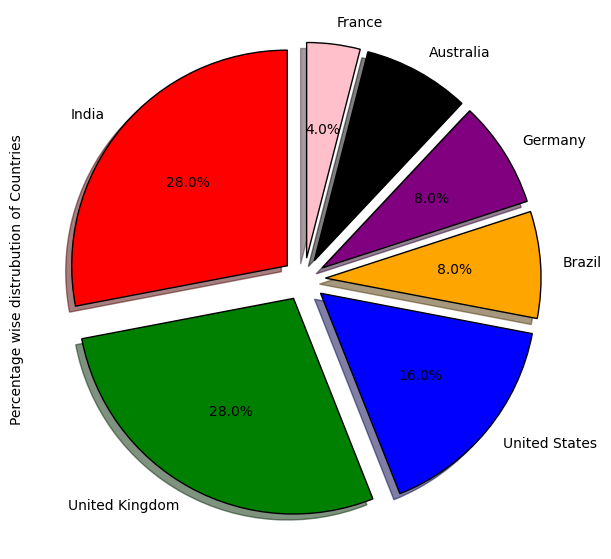

In [24]:
#Graphical representation of percentage data
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green', 'blue','orange','purple','black','pink')
wp = {'linewidth':1, "edgecolor":'black'}
tags = i3['country'].value_counts()/i3.shape[0]
explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of Countries')
from io import  BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")

In [25]:
#Mean rating by each country
i3.groupby('country')['ratingScore'].mean()

country
Australia         5.000000
Brazil            5.000000
France            5.000000
Germany           5.000000
India             3.428571
United Kingdom    4.714286
United States     5.000000
Name: ratingScore, dtype: float64

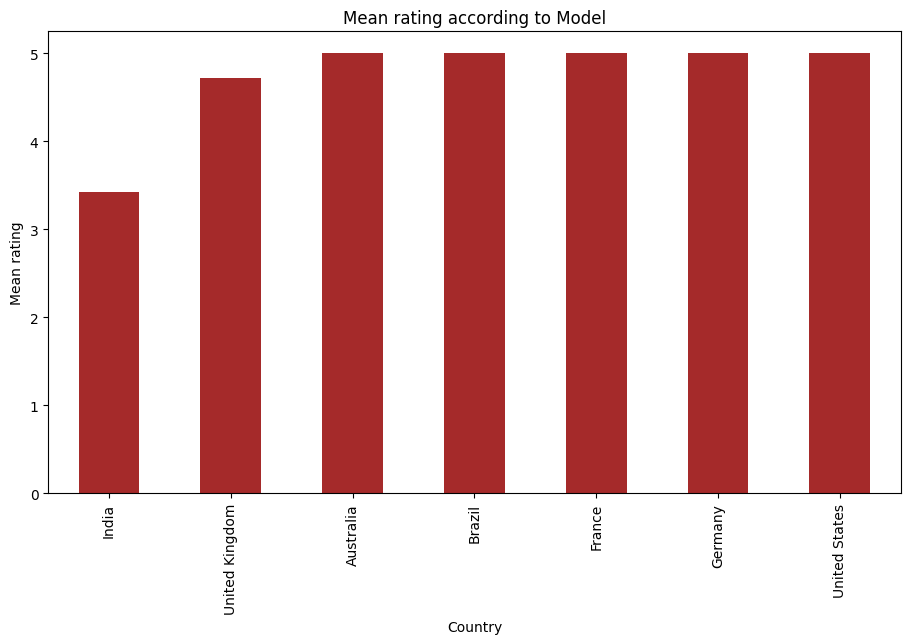

In [26]:
i3.groupby('country')['ratingScore'].mean().sort_values().plot.bar(color = 'brown', figsize=(11, 6))
plt.title("Mean rating according to Model")
plt.xlabel('Country')
plt.ylabel('Mean rating')
plt.show()

# Exploratory Data Analysis on Core i5 Gen-12,13 and 14

In [27]:
i5.head()

country  ratingScore   
0           India            1  \
1           India            1   
2           India            1   
3       Australia            1   
4  United Kingdom            1   

                                   reviewDescription   
0  Fan is not working faulty device.Suggest not t...  \
1  I recently purchased an i5 processor from Amaz...   
2  Don’t buy, there’re selling used and defective...   
3  Received this today, cpu was pre used and ratt...   
4  Still waiting for my refund after a faulty mot...   

                                         reviewTitle        Model Core  
0                                     Faulty product  i5 12th Gen   i5  
1  Disappointing Experience with Defective i5 Pro...  i5 12th Gen   i5  
2                           I received used product.  i5 12th Gen   i5  
3                                           Used CPU  i5 12th Gen   i5  
4                                 Waiting for refund  i5 12th Gen   i5

In [28]:
#Column Names
print(f"Feature names : {i5.columns.values}")

Feature names : ['country' 'ratingScore' 'reviewDescription' 'reviewTitle' 'Model' 'Core']


In [29]:
#Checking for null values
i5.isnull().sum()

country              0
ratingScore          0
reviewDescription    0
reviewTitle          0
Model                0
Core                 0
dtype: int64

In [30]:
#Dataset shape
print(f"Dataset shape : {i5.shape}")

Dataset shape : (163, 6)


In [31]:
#Datatypes of columns
i5.dtypes

country              object
ratingScore           int64
reviewDescription    object
reviewTitle          object
Model                object
Core                 object
dtype: object

In [32]:
#Number of reviews
len(i5)

163

## Analysis of ratingScore Column

In [33]:
#Number of reviews per star
print(f"Rating value count: \n{i5['ratingScore'].value_counts()}")

Rating value count: 
ratingScore
5    117
1     19
4     19
3      7
2      1
Name: count, dtype: int64


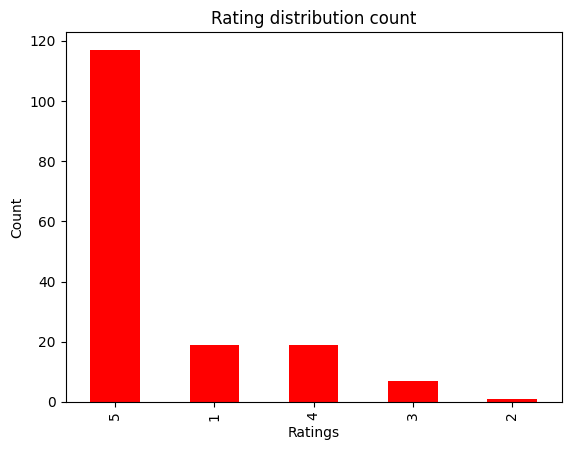

In [34]:
#Bar plot to visualize the total counts of each rating

i5['ratingScore'].value_counts().plot.bar(color = 'red')
plt.title('Rating distribution count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [35]:
#Finding the percentage distribution of each rating
print(f"Rating value count - percentage distribution: \n{round(i5['ratingScore'].value_counts()/i5.shape[0]*100,2)}")

Rating value count - percentage distribution: 
ratingScore
5    71.78
1    11.66
4    11.66
3     4.29
2     0.61
Name: count, dtype: float64


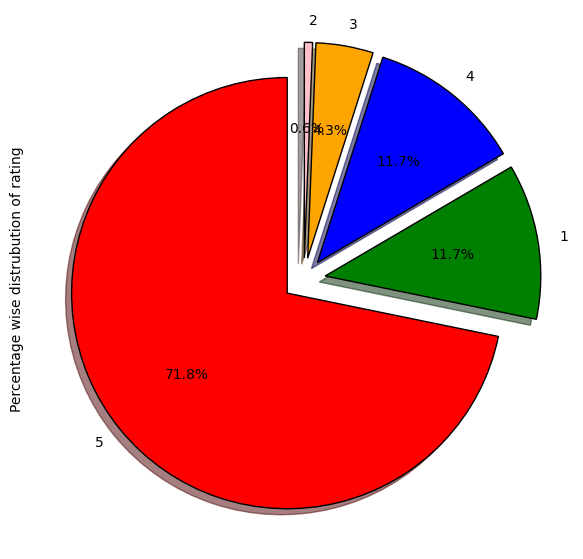

In [36]:
#Graphical representation of percentage data
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green', 'blue','orange','pink')
wp = {'linewidth':1, "edgecolor":'black'}
tags = i5['ratingScore'].value_counts()/i5.shape[0]
explode=(0.1,0.1,0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of rating')
from io import  BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")

## Analysis of Model Column

In [37]:
#Distinct values of 'Model' and its count

print(f"Model value count: \n{i5['Model'].value_counts()}")

Model value count: 
Model
i5 13th Gen    95
i5 12th Gen    62
i5 14th Gen     6
Name: count, dtype: int64


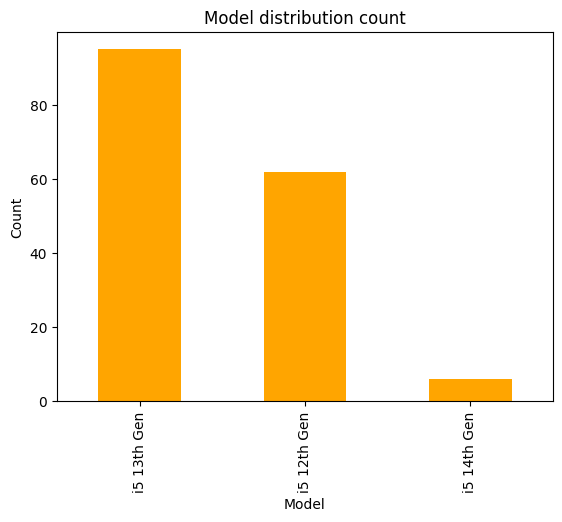

In [38]:
#Bar graph to visualize the total counts of each Model

i5['Model'].value_counts().plot.bar(color = 'orange')
plt.title('Model distribution count')
plt.xlabel('Model')
plt.ylabel('Count')
plt.show()

In [39]:
#Finding the percentage distribution of each variation

print(f"Variation value count - percentage distribution: \n{round(i5['Model'].value_counts()/i5.shape[0]*100,2)}")

Variation value count - percentage distribution: 
Model
i5 13th Gen    58.28
i5 12th Gen    38.04
i5 14th Gen     3.68
Name: count, dtype: float64


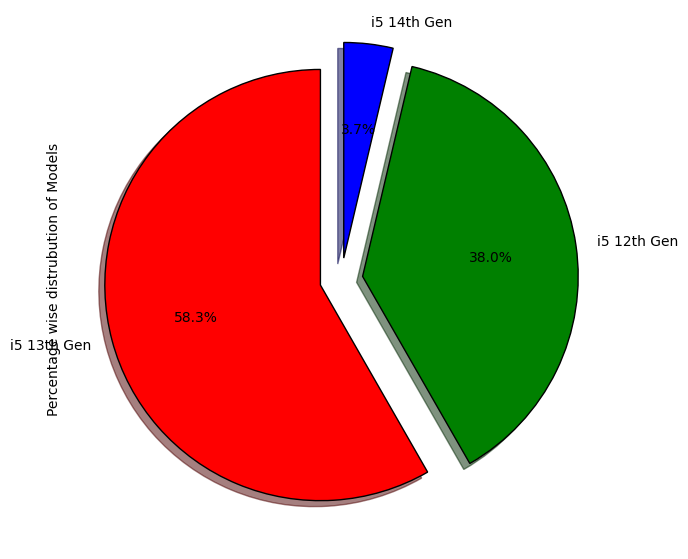

In [40]:
#Graphical representation of percentage data
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green', 'blue')
wp = {'linewidth':1, "edgecolor":'black'}
tags = i5['Model'].value_counts()/i5.shape[0]
explode=(0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of Models')
from io import  BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")

In [41]:
#Mean rating of each model
i5.groupby('Model')['ratingScore'].mean()

Model
i5 12th Gen    3.967742
i5 13th Gen    4.526316
i5 14th Gen    4.500000
Name: ratingScore, dtype: float64

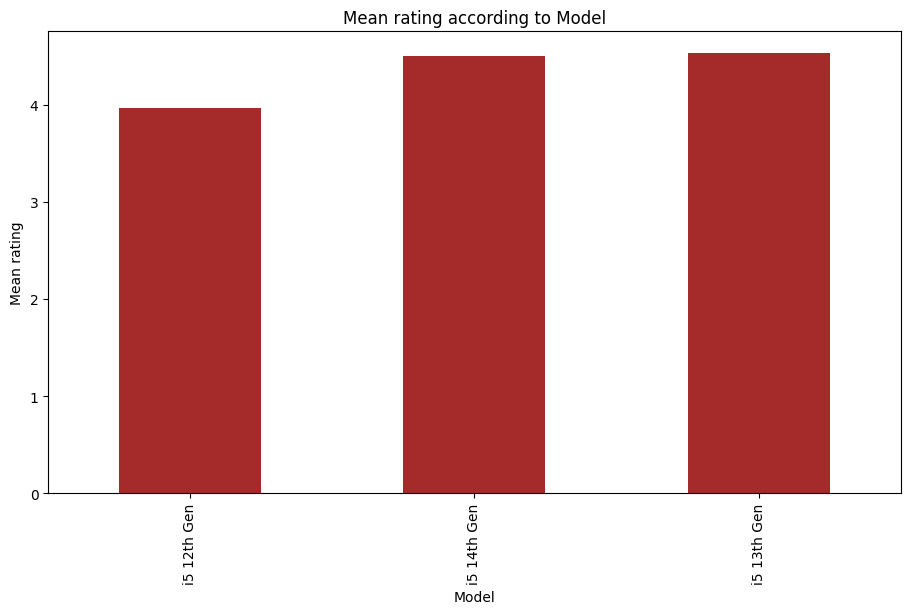

In [42]:
# Visualising rating distribution per model
i5.groupby('Model')['ratingScore'].mean().sort_values().plot.bar(color = 'brown', figsize=(11, 6))
plt.title("Mean rating according to Model")
plt.xlabel('Model')
plt.ylabel('Mean rating')
plt.show()

## Analysing review_Description Column

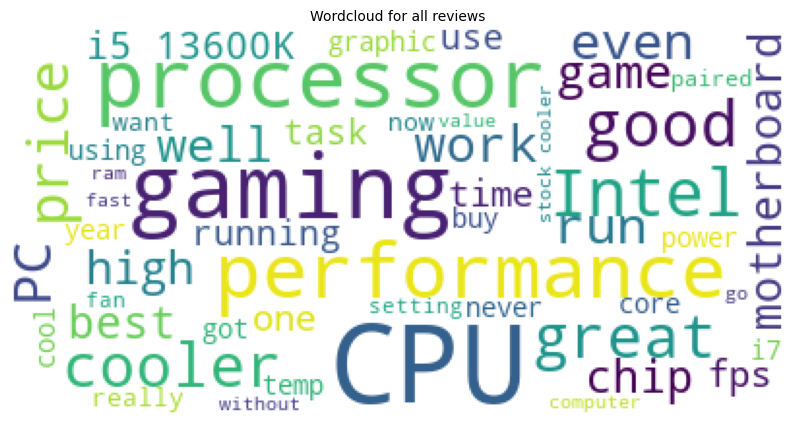

In [43]:
#Generating World Cloud Of Most Common Words used in reviews
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(i5.reviewDescription)
reviews = " ".join([review for review in i5['reviewDescription']])
wc = WordCloud(background_color='white', max_words=50)
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

## Analysing reviewTitle Column

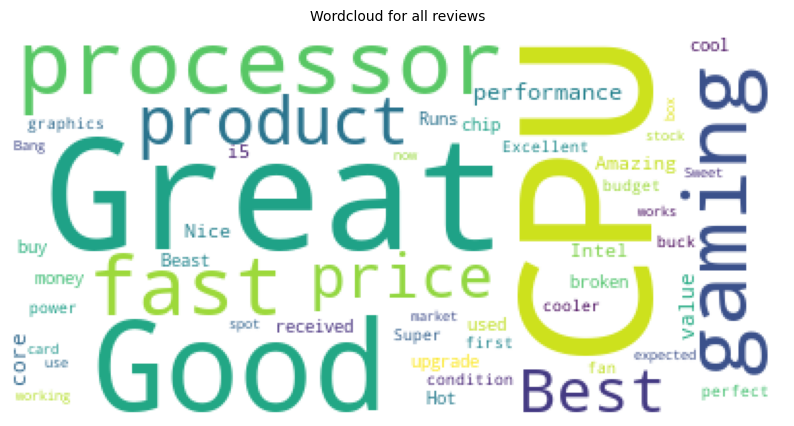

In [44]:
#Generating World Cloud Of Most Common Words used in reviews titles
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(i5.reviewTitle)
reviews = " ".join([review for review in i5['reviewTitle']])
wc = WordCloud(background_color='white', max_words=50)
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

## Analysing Country Column

In [45]:
#Number of reviews per country
print(f"Rating value count: \n{i5['country'].value_counts()}")

Rating value count: 
country
United States     83
India             31
United Kingdom    15
Canada            13
Australia          7
Germany            4
Italy              2
France             2
Belgium            1
Spain              1
Sweden             1
Singapore          1
Japan              1
Brazil             1
Name: count, dtype: int64


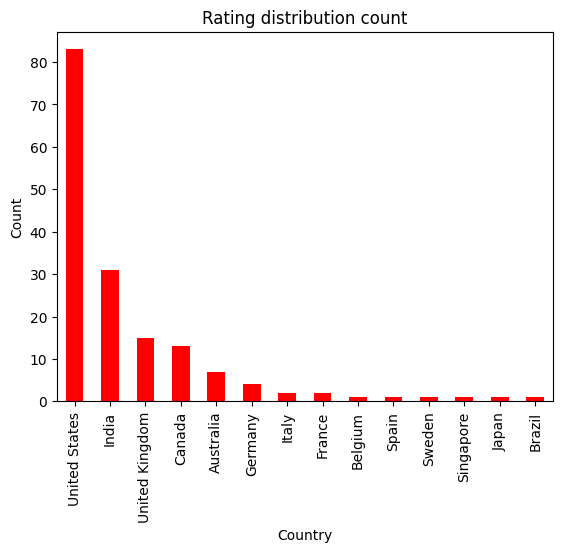

In [46]:
#Bar plot to visualize the total counts of rating per country

i5['country'].value_counts().plot.bar(color = 'red')
plt.title('Rating distribution count')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

In [47]:
#Finding the percentage distribution of each coutry

print(f"Variation value count - percentage distribution: \n{round(i5['country'].value_counts()/i5.shape[0]*100,2)}")

Variation value count - percentage distribution: 
country
United States     50.92
India             19.02
United Kingdom     9.20
Canada             7.98
Australia          4.29
Germany            2.45
Italy              1.23
France             1.23
Belgium            0.61
Spain              0.61
Sweden             0.61
Singapore          0.61
Japan              0.61
Brazil             0.61
Name: count, dtype: float64


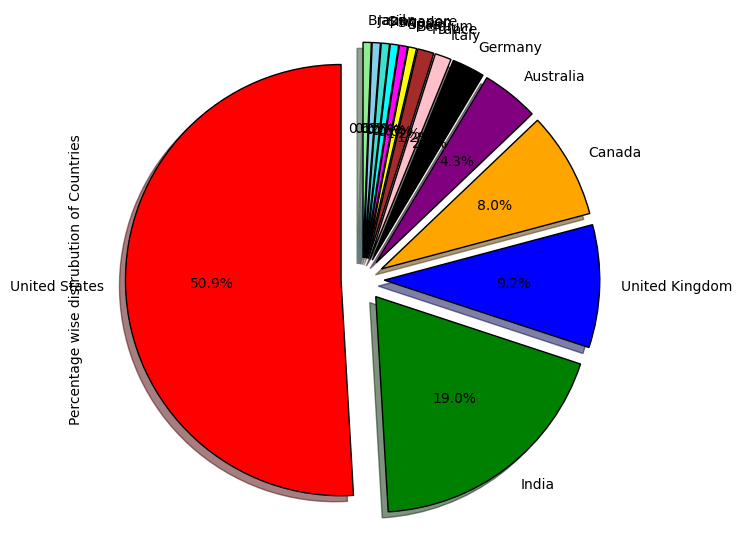

In [48]:
#Graphical representation of percentage data
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green', 'blue','orange','purple','black','pink','brown','yellow','magenta','cyan','turquoise','skyblue','lightgreen')
wp = {'linewidth':1, "edgecolor":'black'}
tags = i5['country'].value_counts()/i5.shape[0]
explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of Countries')
from io import  BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")

In [49]:
#Mean rating by each country
i5.groupby('country')['ratingScore'].mean()

country
Australia         3.428571
Belgium           4.000000
Brazil            5.000000
Canada            4.461538
France            4.500000
Germany           4.500000
India             4.419355
Italy             3.000000
Japan             5.000000
Singapore         5.000000
Spain             4.000000
Sweden            5.000000
United Kingdom    3.266667
United States     4.506024
Name: ratingScore, dtype: float64

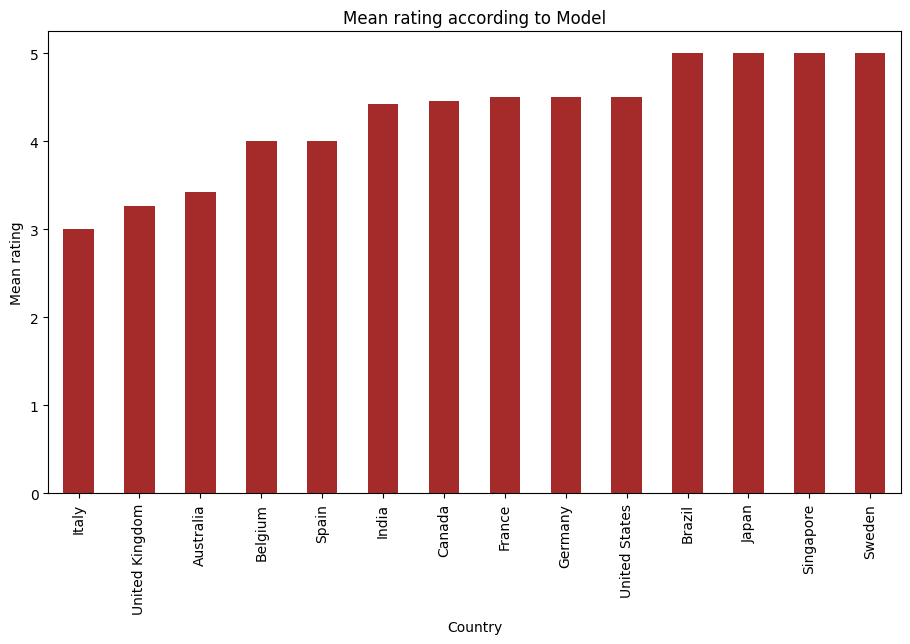

In [50]:
i5.groupby('country')['ratingScore'].mean().sort_values().plot.bar(color = 'brown', figsize=(11, 6))
plt.title("Mean rating according to Model")
plt.xlabel('Country')
plt.ylabel('Mean rating')
plt.show()

# Exploratory Data Analysis on Core i7 Gen-12,13 and 14

In [51]:
i7.head()

country  ratingScore   
0  United Kingdom            3  \
1  United Kingdom            4   
2           India            5   
3  United Kingdom            5   
4  United Kingdom            5   

                                   reviewDescription   
0  Before buying keep in mind that you might need...  \
1  Costs a lot and I do not recommend to anyone w...   
2                               Ultimate Performance   
3  Upgraded PC with mother board and graphics car...   
4  Paired this with 32gb corsair dominator DDR5 @...   

                        reviewTitle        Model Core  
0  Good processor with a bad cooler  i7 12th Gen   i7  
1                       Works great  i7 12th Gen   i7  
2                             ....!  i7 12th Gen   i7  
3          Fast enough for my needs  i7 12th Gen   i7  
4                       12700 non k  i7 12th Gen   i7

In [52]:
#Column Names
print(f"Feature names : {i7.columns.values}")

Feature names : ['country' 'ratingScore' 'reviewDescription' 'reviewTitle' 'Model' 'Core']


In [53]:
#Checking for null values
i7.isnull().sum()

country              0
ratingScore          0
reviewDescription    0
reviewTitle          0
Model                0
Core                 0
dtype: int64

In [54]:
#Dataset shape
print(f"Dataset shape : {i7.shape}")

Dataset shape : (136, 6)


In [55]:
#Datatypes of columns
i7.dtypes

country              object
ratingScore           int64
reviewDescription    object
reviewTitle          object
Model                object
Core                 object
dtype: object

In [56]:
#Number of reviews
len(i7)

136

## Analysing ratingScore Column

In [57]:
#Number of reviews per star
print(f"Rating value count: \n{i7['ratingScore'].value_counts()}")

Rating value count: 
ratingScore
5    96
1    18
4    17
3     5
Name: count, dtype: int64


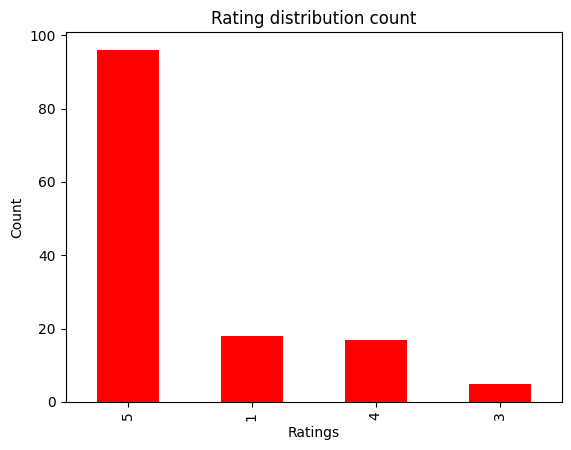

In [58]:
#Bar plot to visualize the total counts of each rating

i7['ratingScore'].value_counts().plot.bar(color = 'red')
plt.title('Rating distribution count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [59]:
#Finding the percentage distribution of each rating
print(f"Rating value count - percentage distribution: \n{round(i7['ratingScore'].value_counts()/i7.shape[0]*100,2)}")

Rating value count - percentage distribution: 
ratingScore
5    70.59
1    13.24
4    12.50
3     3.68
Name: count, dtype: float64


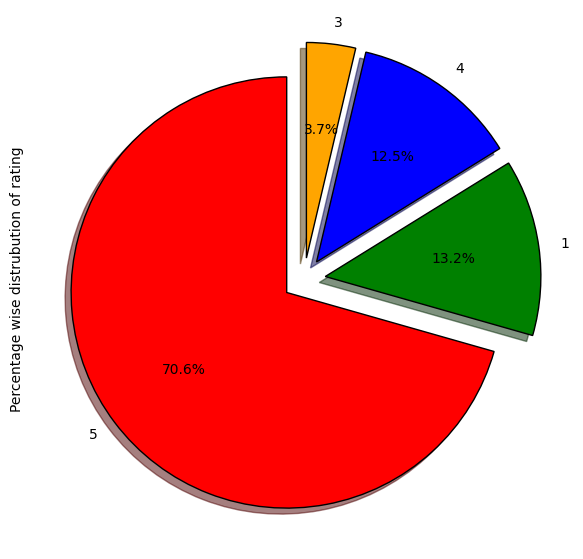

In [60]:
#Graphical representation of percentage data
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green', 'blue','orange')
wp = {'linewidth':1, "edgecolor":'black'}
tags = i7['ratingScore'].value_counts()/i7.shape[0]
explode=(0.1,0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of rating')
from io import  BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")

## Analysing Model Column

In [61]:
#Distinct values of 'Model' and its count

print(f"Model value count: \n{i7['Model'].value_counts()}")

Model value count: 
Model
i7 13th Gen    107
i7 14th Gen     22
i7 12th Gen      7
Name: count, dtype: int64


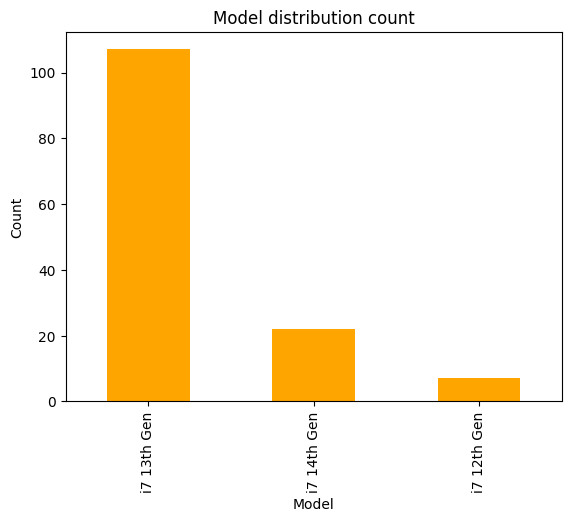

In [62]:
#Bar graph to visualize the total counts of each Model

i7['Model'].value_counts().plot.bar(color = 'orange')
plt.title('Model distribution count')
plt.xlabel('Model')
plt.ylabel('Count')
plt.show()

In [63]:
#Finding the percentage distribution of each variation

print(f"Variation value count - percentage distribution: \n{round(i7['Model'].value_counts()/i7.shape[0]*100,2)}")

Variation value count - percentage distribution: 
Model
i7 13th Gen    78.68
i7 14th Gen    16.18
i7 12th Gen     5.15
Name: count, dtype: float64


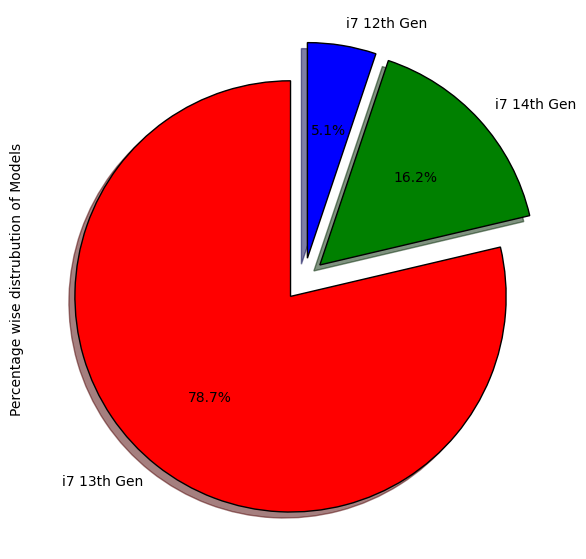

In [64]:
#Graphical representation of percentage data
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green', 'blue')
wp = {'linewidth':1, "edgecolor":'black'}
tags = i7['Model'].value_counts()/i7.shape[0]
explode=(0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of Models')
from io import  BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")

In [65]:
#Mean rating of each model
i7.groupby('Model')['ratingScore'].mean()

Model
i7 12th Gen    4.571429
i7 13th Gen    4.261682
i7 14th Gen    4.227273
Name: ratingScore, dtype: float64

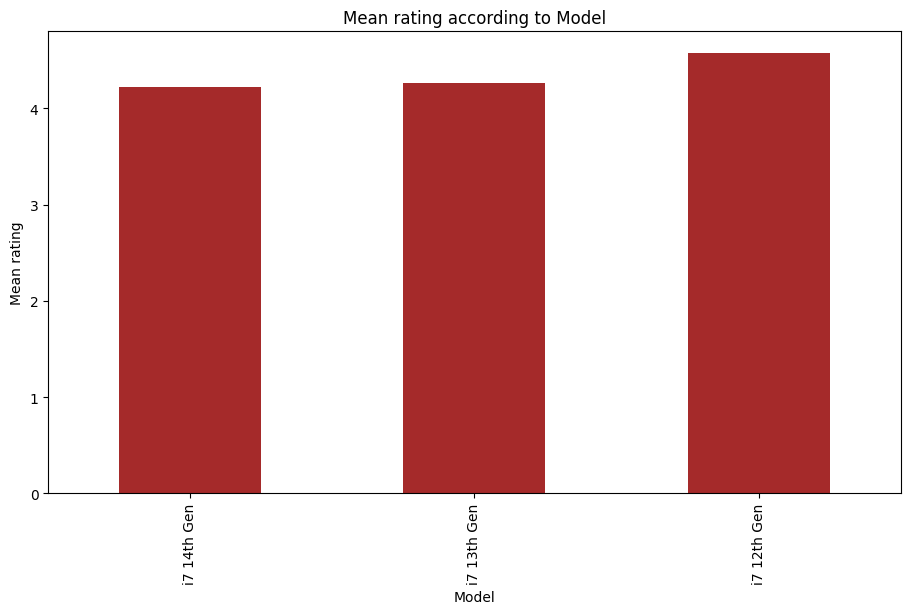

In [66]:
# Visualising rating distribution per model
i7.groupby('Model')['ratingScore'].mean().sort_values().plot.bar(color = 'brown', figsize=(11, 6))
plt.title("Mean rating according to Model")
plt.xlabel('Model')
plt.ylabel('Mean rating')
plt.show()

## Analysing reviewDescription Column

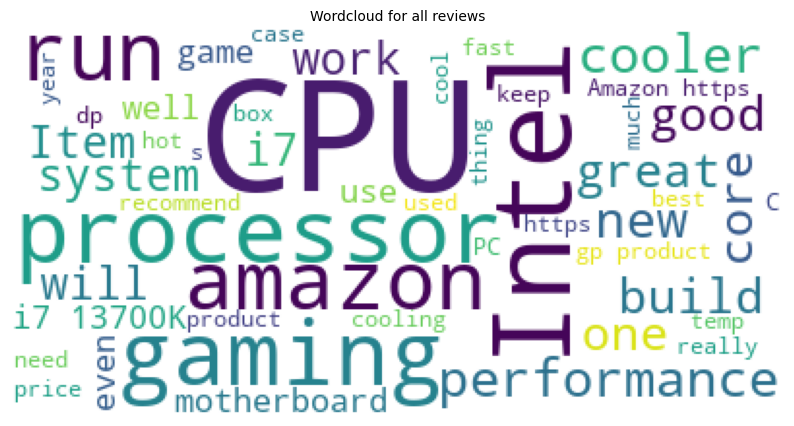

In [67]:
#Generating World Cloud Of Most Common Words used in reviews
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(i7.reviewDescription)
reviews = " ".join([review for review in i7['reviewDescription']])
wc = WordCloud(background_color='white', max_words=50)
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

## Analysing reviewTitle Column

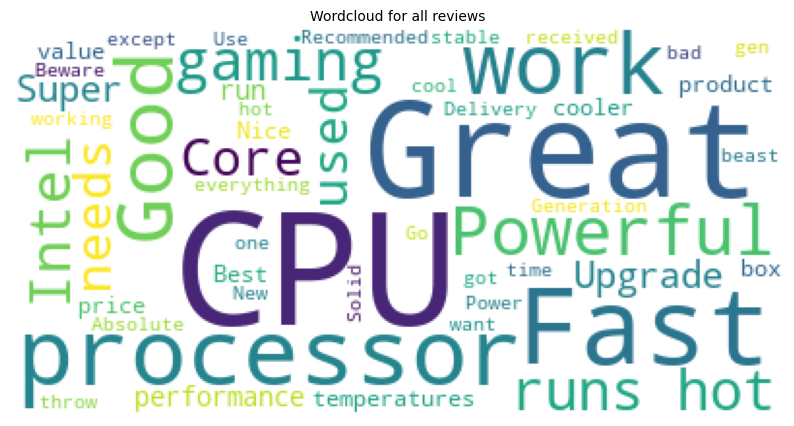

In [68]:
#Generating World Cloud Of Most Common Words used in reviews titles
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(i7.reviewTitle)
reviews = " ".join([review for review in i7['reviewTitle']])
wc = WordCloud(background_color='white', max_words=50)
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

## Analysing country Column

In [69]:
#Number of reviews per country
print(f"Rating value count: \n{i7['country'].value_counts()}")

Rating value count: 
country
United States     110
Canada             12
United Kingdom      5
India               4
Germany             2
Spain               1
Mexico              1
Japan               1
Name: count, dtype: int64


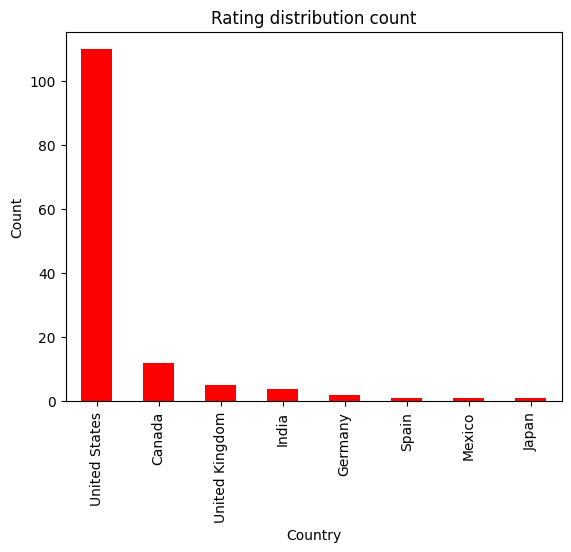

In [70]:
#Bar plot to visualize the total counts of rating per country

i7['country'].value_counts().plot.bar(color = 'red')
plt.title('Rating distribution count')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

In [71]:
#Finding the percentage distribution of each coutry

print(f"Variation value count - percentage distribution: \n{round(i7['country'].value_counts()/i7.shape[0]*100,2)}")

Variation value count - percentage distribution: 
country
United States     80.88
Canada             8.82
United Kingdom     3.68
India              2.94
Germany            1.47
Spain              0.74
Mexico             0.74
Japan              0.74
Name: count, dtype: float64


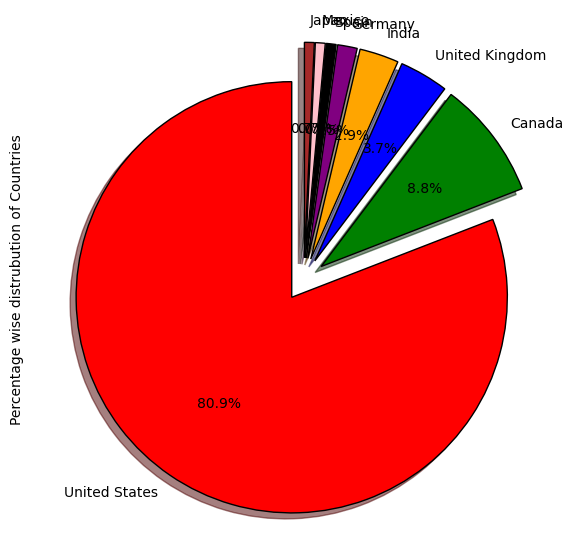

In [72]:
#Graphical representation of percentage data
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green', 'blue','orange','purple','black','pink','brown')
wp = {'linewidth':1, "edgecolor":'black'}
tags = i7['country'].value_counts()/i7.shape[0]
explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of Countries')
from io import  BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")

In [73]:
#Mean rating by each country
i7.groupby('country')['ratingScore'].mean()

country
Canada            4.083333
Germany           5.000000
India             5.000000
Japan             5.000000
Mexico            5.000000
Spain             5.000000
United Kingdom    4.400000
United States     4.227273
Name: ratingScore, dtype: float64

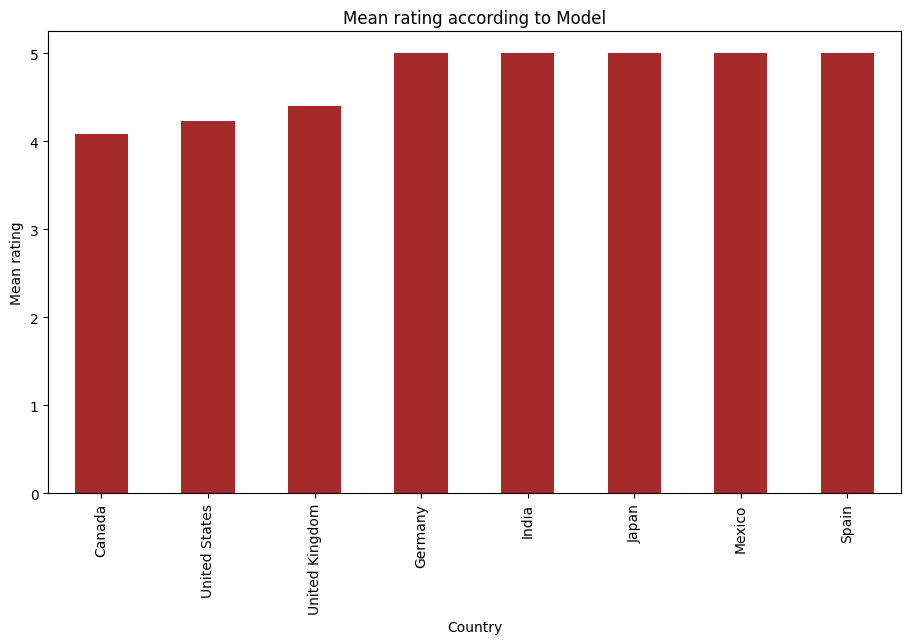

In [74]:
i7.groupby('country')['ratingScore'].mean().sort_values().plot.bar(color = 'brown', figsize=(11, 6))
plt.title("Mean rating according to Model")
plt.xlabel('Country')
plt.ylabel('Mean rating')
plt.show()

# Exploratory Data Analysis on Core i9 Gen-12,13 and 14

In [75]:
i9.head()

country  ratingScore   
0          India            5  \
1          India            5   
2         France            5   
3  United States            5   
4          Japan            5   

                                   reviewDescription   
0  I brought this processor for my gaming/worksta...  \
1  Was using amd cpu untill now. Cpu died in 2 ye...   
2                                               Bien   
3  I recently got my hands on the Intel Core i9-1...   
4  I purchase this CPU 1 year ago and it cost me ...   

                                         reviewTitle        Model Core  
0                        This processor is a beast 🔥  i9 12th Gen   i9  
1                             Nothing can beat intel  i9 12th Gen   i9  
2                     Produit conforme à la demande.  i9 12th Gen   i9  
3  The processor also runs surprisingly cool, eve...  i9 12th Gen   i9  
4       all wat I needed for the next coming 5 years  i9 12th Gen   i9

In [76]:
#Column Names
print(f"Feature names : {i9.columns.values}")

Feature names : ['country' 'ratingScore' 'reviewDescription' 'reviewTitle' 'Model' 'Core']


In [77]:
#Checking for null values
i9.isnull().sum()

country              0
ratingScore          0
reviewDescription    0
reviewTitle          0
Model                0
Core                 0
dtype: int64

In [78]:
#Datatypes of columns
i9.dtypes

country              object
ratingScore           int64
reviewDescription    object
reviewTitle          object
Model                object
Core                 object
dtype: object

In [79]:
#Dataset shape
print(f"Dataset shape : {i9.shape}")

Dataset shape : (227, 6)


In [80]:
#Number of reviews
len(i9)

227

## Analysing ratingScore Column

In [81]:
#Number of reviews per star
print(f"Rating value count: \n{i9['ratingScore'].value_counts()}")

Rating value count: 
ratingScore
5    160
1     35
4     16
3     10
2      6
Name: count, dtype: int64


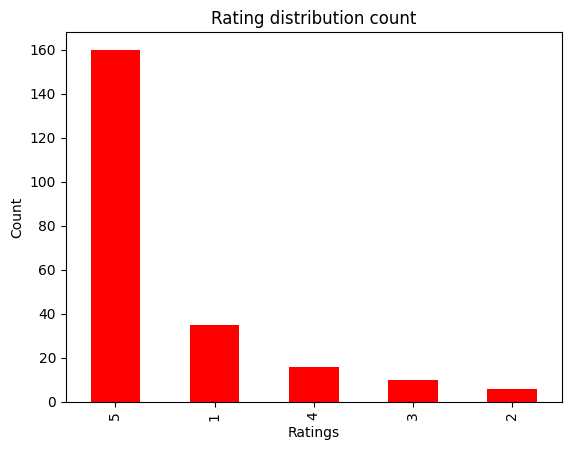

In [82]:
#Bar plot to visualize the total counts of each rating

i9['ratingScore'].value_counts().plot.bar(color = 'red')
plt.title('Rating distribution count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [83]:
#Finding the percentage distribution of each rating
print(f"Rating value count - percentage distribution: \n{round(i9['ratingScore'].value_counts()/i9.shape[0]*100,2)}")

Rating value count - percentage distribution: 
ratingScore
5    70.48
1    15.42
4     7.05
3     4.41
2     2.64
Name: count, dtype: float64


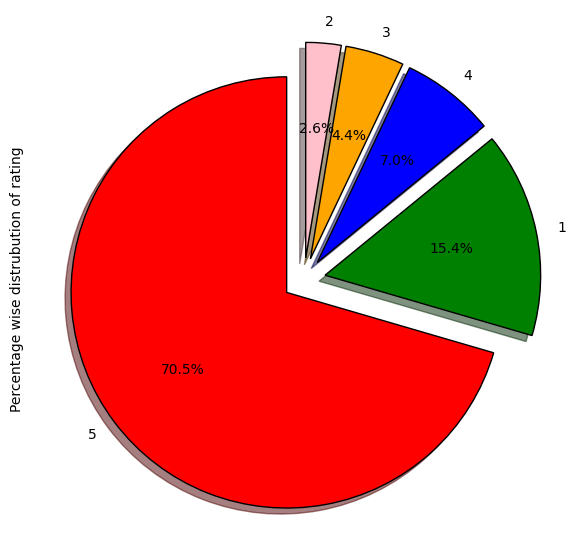

In [84]:
#Graphical representation of percentage data
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green', 'blue','orange','pink')
wp = {'linewidth':1, "edgecolor":'black'}
tags = i9['ratingScore'].value_counts()/i9.shape[0]
explode=(0.1,0.1,0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of rating')
from io import  BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")

## Analysing Model Column

In [85]:
#Distinct values of 'Model' and its count

print(f"Model value count: \n{i9['Model'].value_counts()}")

Model value count: 
Model
i9 12th Gen    104
i9 14th Gen     90
i9 13th Gen     33
Name: count, dtype: int64


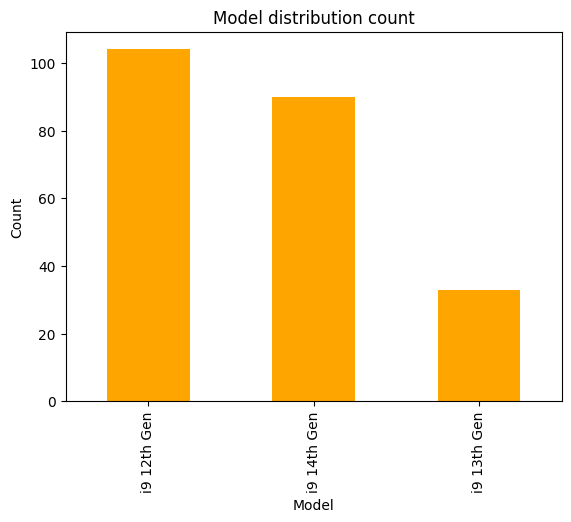

In [86]:
#Bar graph to visualize the total counts of each Model

i9['Model'].value_counts().plot.bar(color = 'orange')
plt.title('Model distribution count')
plt.xlabel('Model')
plt.ylabel('Count')
plt.show()

In [87]:
#Finding the percentage distribution of each variation

print(f"Variation value count - percentage distribution: \n{round(i9['Model'].value_counts()/i9.shape[0]*100,2)}")

Variation value count - percentage distribution: 
Model
i9 12th Gen    45.81
i9 14th Gen    39.65
i9 13th Gen    14.54
Name: count, dtype: float64


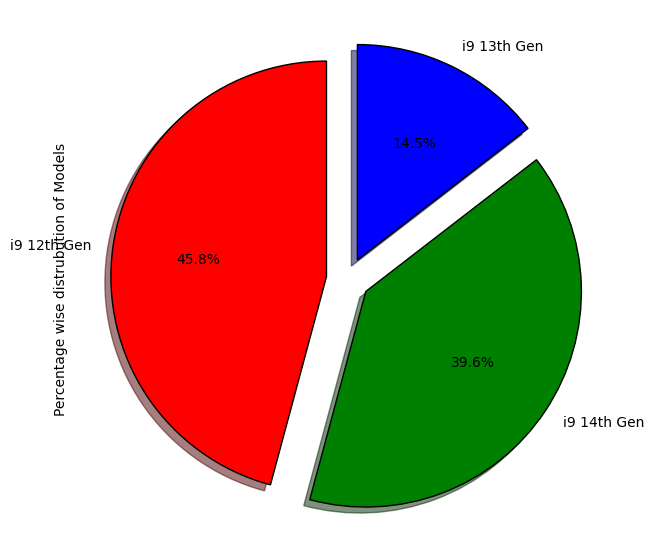

In [88]:
#Graphical representation of percentage data
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green', 'blue')
wp = {'linewidth':1, "edgecolor":'black'}
tags = i9['Model'].value_counts()/i9.shape[0]
explode=(0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of Models')
from io import  BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")

In [89]:
#Mean rating of each model
i9.groupby('Model')['ratingScore'].mean()

Model
i9 12th Gen    4.278846
i9 13th Gen    4.303030
i9 14th Gen    3.933333
Name: ratingScore, dtype: float64

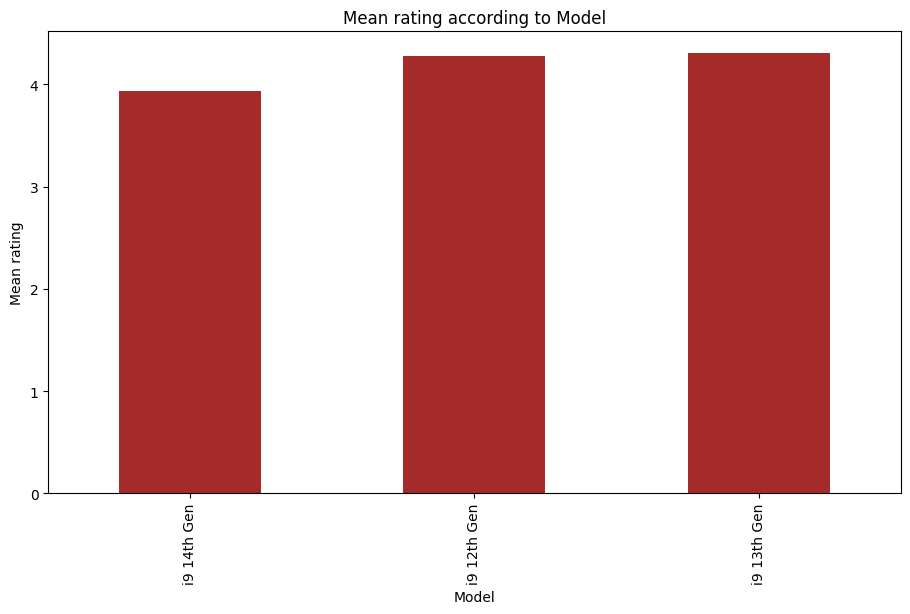

In [90]:
# Visualising rating distribution per model
i9.groupby('Model')['ratingScore'].mean().sort_values().plot.bar(color = 'brown', figsize=(11, 6))
plt.title("Mean rating according to Model")
plt.xlabel('Model')
plt.ylabel('Mean rating')
plt.show()

## Analysing textDescription Column

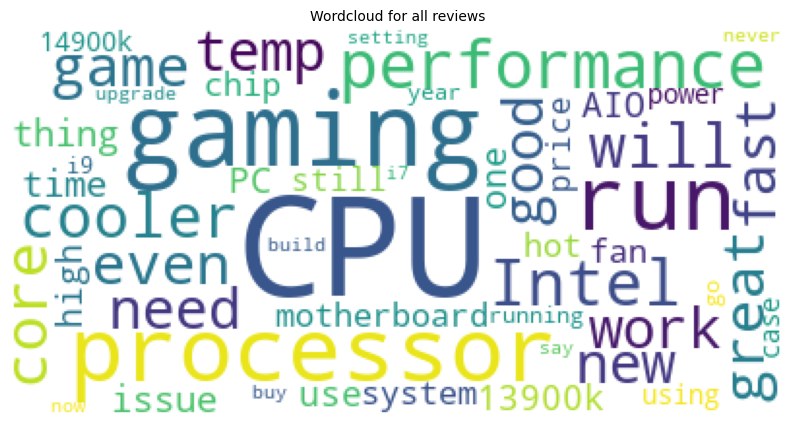

In [91]:
#Generating World Cloud Of Most Common Words used in reviews
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(i9.reviewDescription)
reviews = " ".join([review for review in i9['reviewDescription']])
wc = WordCloud(background_color='white', max_words=50)
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

## Analysing reviewTitle Column

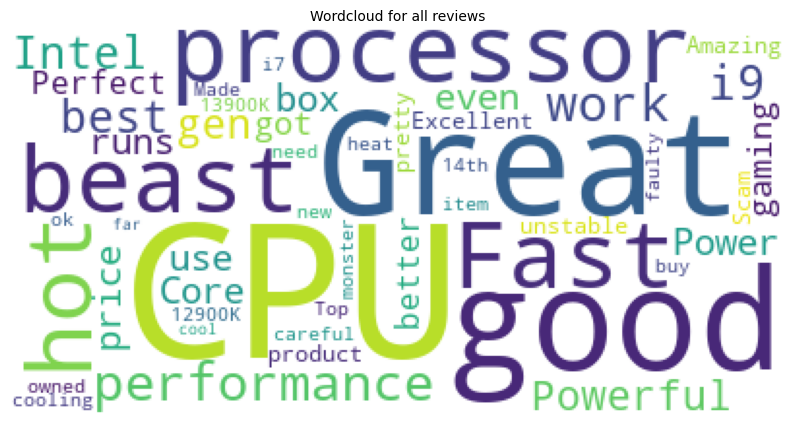

In [92]:
#Generating World Cloud Of Most Common Words used in reviews titles
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(i9.reviewTitle)
reviews = " ".join([review for review in i9['reviewTitle']])
wc = WordCloud(background_color='white', max_words=50)
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

## Analysing country Column

In [93]:
#Number of reviews per country
print(f"Rating value count: \n{i9['country'].value_counts()}")

Rating value count: 
country
United States     168
United Kingdom     19
Canada             14
Germany             9
India               6
Japan               3
Australia           2
Spain               2
France              1
Sweden              1
Netherlands         1
Italy               1
Name: count, dtype: int64


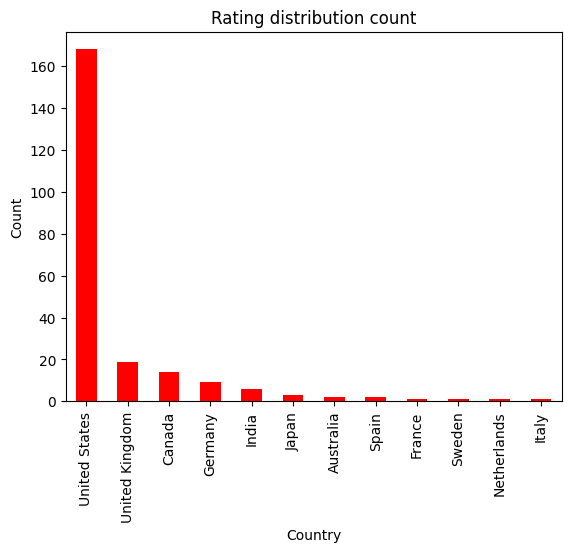

In [94]:
#Bar plot to visualize the total counts of rating per country

i9['country'].value_counts().plot.bar(color = 'red')
plt.title('Rating distribution count')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

In [95]:
#Finding the percentage distribution of each coutry

print(f"Variation value count - percentage distribution: \n{round(i9['country'].value_counts()/i9.shape[0]*100,2)}")

Variation value count - percentage distribution: 
country
United States     74.01
United Kingdom     8.37
Canada             6.17
Germany            3.96
India              2.64
Japan              1.32
Australia          0.88
Spain              0.88
France             0.44
Sweden             0.44
Netherlands        0.44
Italy              0.44
Name: count, dtype: float64


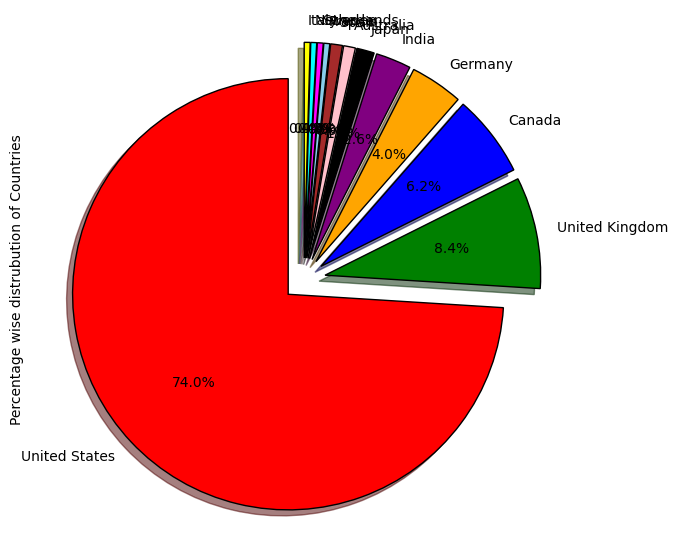

In [96]:
#Graphical representation of percentage data
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green', 'blue','orange','purple','black','pink','brown','skyblue','magenta','cyan','yellow')
wp = {'linewidth':1, "edgecolor":'black'}
tags = i9['country'].value_counts()/i9.shape[0]
explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of Countries')
from io import  BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")

In [97]:
#Mean rating by each country
i9.groupby('country')['ratingScore'].mean()

country
Australia         3.000000
Canada            4.214286
France            5.000000
Germany           4.000000
India             3.000000
Italy             5.000000
Japan             4.666667
Netherlands       5.000000
Spain             5.000000
Sweden            5.000000
United Kingdom    4.263158
United States     4.148810
Name: ratingScore, dtype: float64

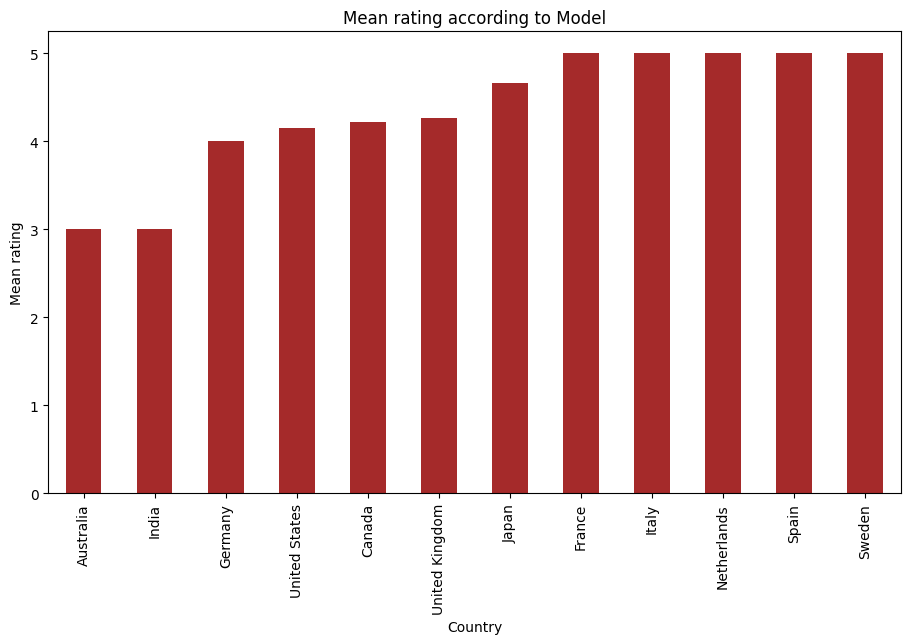

In [98]:
i9.groupby('country')['ratingScore'].mean().sort_values().plot.bar(color = 'brown', figsize=(11, 6))
plt.title("Mean rating according to Model")
plt.xlabel('Country')
plt.ylabel('Mean rating')
plt.show()

# Explorating Data Analysis of all Intel Core Processors

In [99]:
all_core.head()

country  ratingScore                                  reviewDescription   
0   India            1  Cpu stock cooler fan got broken with 1 blade i...  \
1   India            1  The Processor is Good & Works Fine. But The De...   
2   India            4                                Performance is good   
3   India            5  If you would be building pc just for gaming an...   
4   India            5  This is one of the best cpu in budget if you o...   

                                         reviewTitle        Model Core  
0                                cpu with broken fan  i3 12th Gen   i3  
1                        Good Cpu but awful Delivery  i3 12th Gen   i3  
2                                               Good  i3 12th Gen   i3  
3  This is the best you'll get in this price rang...  i3 12th Gen   i3  
4                                            Awesome  i3 12th Gen   i3

In [100]:
#Column Names
print(f"Feature names : {all_core.columns.values}")

Feature names : ['country' 'ratingScore' 'reviewDescription' 'reviewTitle' 'Model' 'Core']


In [101]:
#Checking for null values
all_core.isnull().sum()

country              0
ratingScore          0
reviewDescription    0
reviewTitle          0
Model                0
Core                 0
dtype: int64

In [102]:
#Datatypes of columns
all_core.dtypes

country              object
ratingScore           int64
reviewDescription    object
reviewTitle          object
Model                object
Core                 object
dtype: object

In [103]:
#Dataset shape
print(f"Dataset shape : {all_core.shape}")

Dataset shape : (551, 6)


In [104]:
#Number of reviews
len(all_core)

551

## Analysing ratingScore Column

In [105]:
#Number of reviews per star
print(f"Rating value count: \n{all_core['ratingScore'].value_counts()}")

Rating value count: 
ratingScore
5    393
1     74
4     53
3     24
2      7
Name: count, dtype: int64


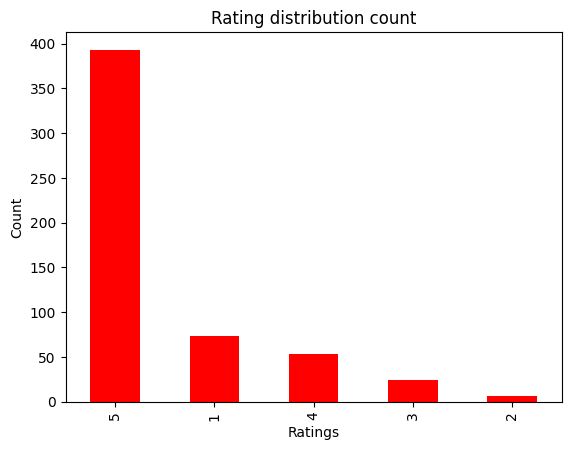

In [106]:
#Bar plot to visualize the total counts of each rating

all_core['ratingScore'].value_counts().plot.bar(color = 'red')
plt.title('Rating distribution count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [107]:
#Finding the percentage distribution of each rating
print(f"Rating value count - percentage distribution: \n{round(all_core['ratingScore'].value_counts()/all_core.shape[0]*100,2)}")

Rating value count - percentage distribution: 
ratingScore
5    71.32
1    13.43
4     9.62
3     4.36
2     1.27
Name: count, dtype: float64


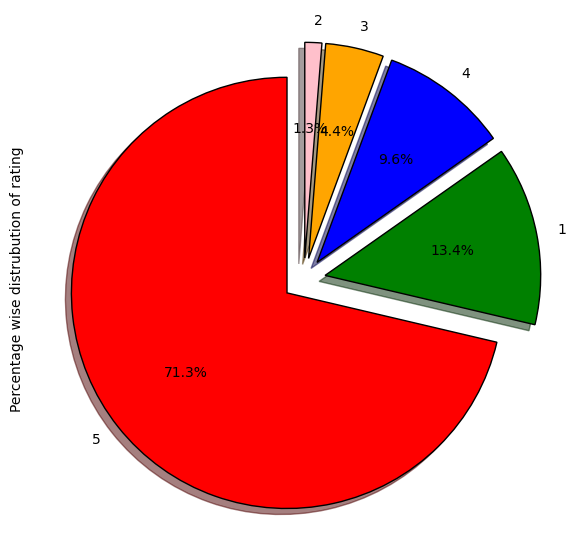

In [108]:
#Graphical representation of percentage data
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green', 'blue','orange','pink')
wp = {'linewidth':1, "edgecolor":'black'}
tags = all_core['ratingScore'].value_counts()/all_core.shape[0]
explode=(0.1,0.1,0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of rating')
from io import  BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")

## Analysing Core Column

In [109]:
#Distinct values of 'Model' and its count

print(f"Model value count: \n{all_core['Core'].value_counts()}")

Model value count: 
Core
i9    227
i5    163
i7    136
i3     25
Name: count, dtype: int64


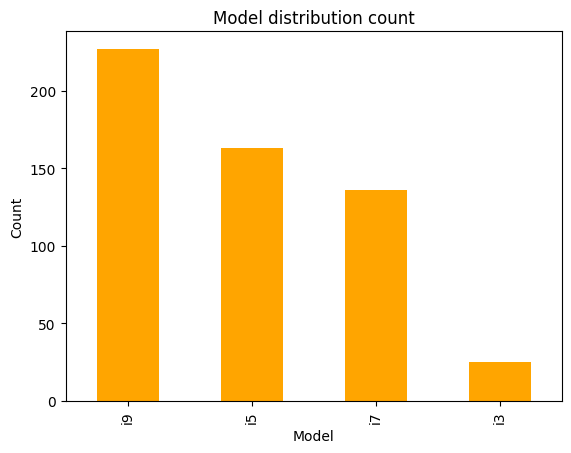

In [110]:
#Bar graph to visualize the total counts of each Model

all_core['Core'].value_counts().plot.bar(color = 'orange')
plt.title('Model distribution count')
plt.xlabel('Model')
plt.ylabel('Count')
plt.show()

In [111]:
#Finding the percentage distribution of each variation

print(f"Variation value count - percentage distribution: \n{round(all_core['Core'].value_counts()/all_core.shape[0]*100,2)}")

Variation value count - percentage distribution: 
Core
i9    41.20
i5    29.58
i7    24.68
i3     4.54
Name: count, dtype: float64


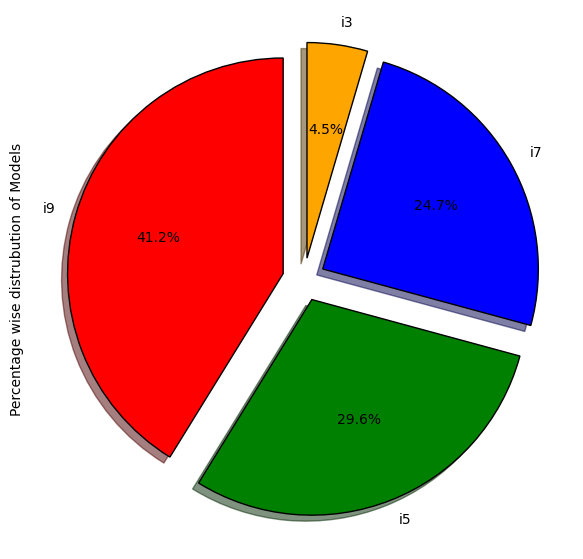

In [112]:
#Graphical representation of percentage data
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green', 'blue','orange')
wp = {'linewidth':1, "edgecolor":'black'}
tags = all_core['Core'].value_counts()/all_core.shape[0]
explode=(0.1,0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of Models')
from io import  BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")

In [113]:
#Mean rating of each model
all_core.groupby('Core')['ratingScore'].mean()

Core
i3    4.480000
i5    4.312883
i7    4.272059
i9    4.145374
Name: ratingScore, dtype: float64

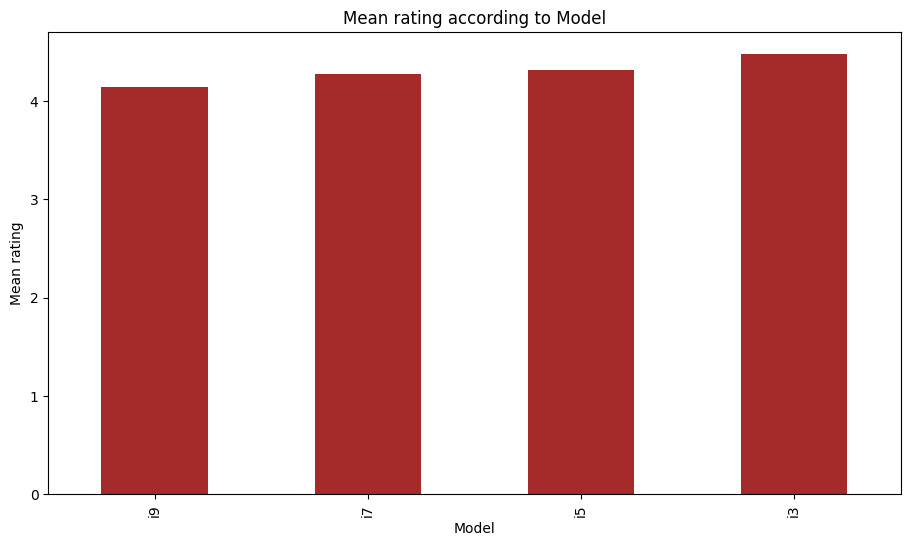

In [114]:
# Visualising rating distribution per model
all_core.groupby('Core')['ratingScore'].mean().sort_values().plot.bar(color = 'brown', figsize=(11, 6))
plt.title("Mean rating according to Model")
plt.xlabel('Model')
plt.ylabel('Mean rating')
plt.show()

## Analysing reviewDescription Column

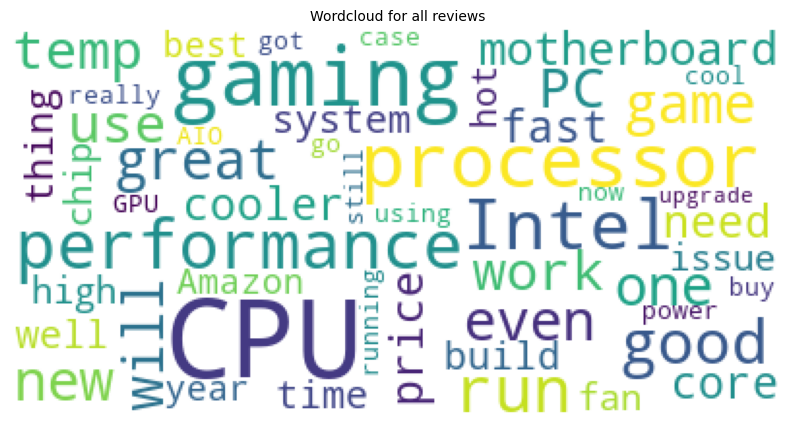

In [115]:
#Generating World Cloud Of Most Common Words used in reviews
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(all_core.reviewDescription)
reviews = " ".join([review for review in all_core['reviewDescription']])
wc = WordCloud(background_color='white', max_words=50)
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

## Analysing reviewTitle Column

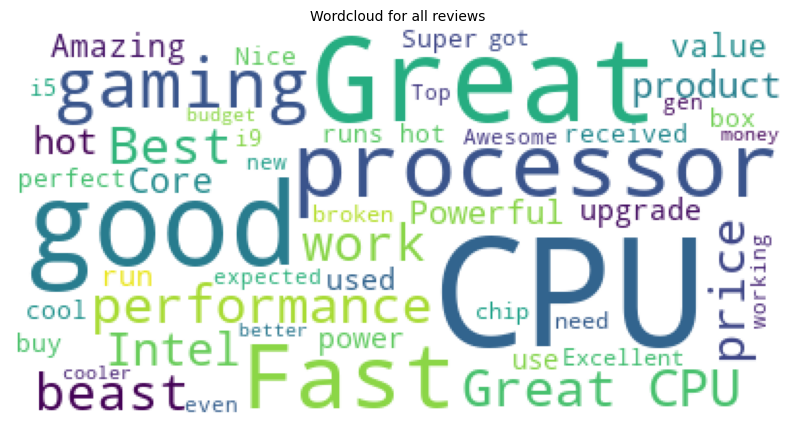

In [116]:
#Generating World Cloud Of Most Common Words used in reviews titles
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(all_core.reviewTitle)
reviews = " ".join([review for review in all_core['reviewTitle']])
wc = WordCloud(background_color='white', max_words=50)
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

## Analysing country Column

In [117]:
#Number of reviews per country
print(f"Rating value count: \n{all_core['country'].value_counts()}")

Rating value count: 
country
United States     365
India              48
United Kingdom     46
Canada             39
Germany            17
Australia          11
Japan               5
France              4
Spain               4
Brazil              3
Italy               3
Sweden              2
Belgium             1
Singapore           1
Mexico              1
Netherlands         1
Name: count, dtype: int64


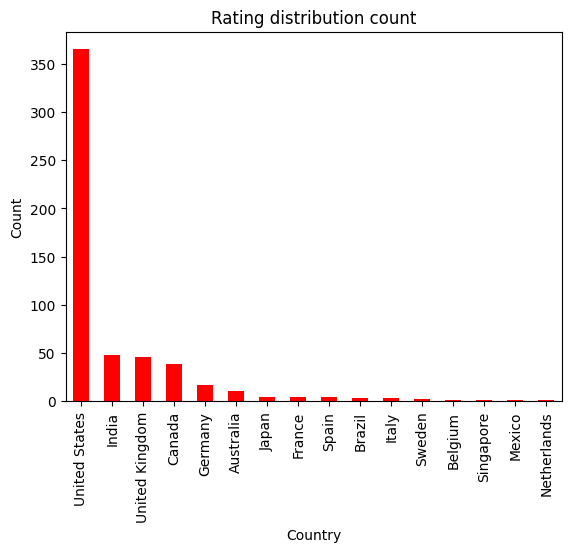

In [118]:
#Bar plot to visualize the total counts of rating per country

all_core['country'].value_counts().plot.bar(color = 'red')
plt.title('Rating distribution count')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

In [119]:
#Finding the percentage distribution of each coutry

print(f"Variation value count - percentage distribution: \n{round(all_core['country'].value_counts()/all_core.shape[0]*100,2)}")

Variation value count - percentage distribution: 
country
United States     66.24
India              8.71
United Kingdom     8.35
Canada             7.08
Germany            3.09
Australia          2.00
Japan              0.91
France             0.73
Spain              0.73
Brazil             0.54
Italy              0.54
Sweden             0.36
Belgium            0.18
Singapore          0.18
Mexico             0.18
Netherlands        0.18
Name: count, dtype: float64


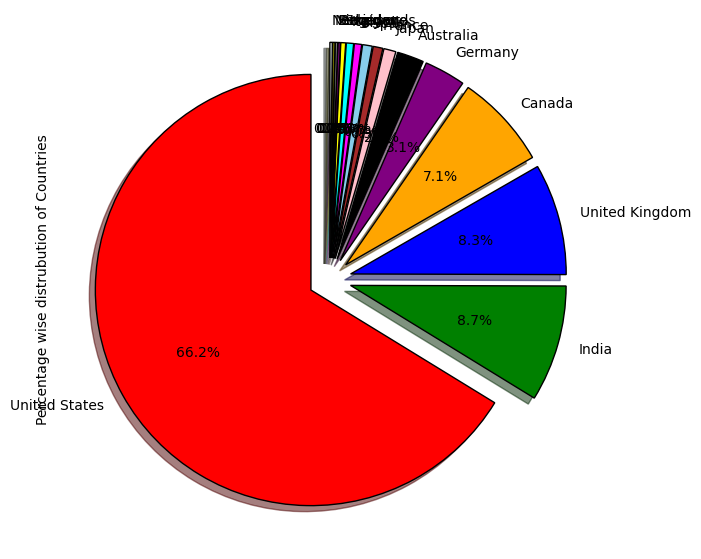

In [120]:
#Graphical representation of percentage data
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green', 'blue','orange','purple','black','pink','brown','skyblue','magenta','cyan','yellow','purple','gray','olive','azure')
wp = {'linewidth':1, "edgecolor":'black'}
tags = all_core['country'].value_counts()/all_core.shape[0]
explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of Countries')
from io import  BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")

In [121]:
#Mean rating by each country
all_core.groupby('country')['ratingScore'].mean()

country
Australia         3.636364
Belgium           4.000000
Brazil            5.000000
Canada            4.256410
France            4.750000
Germany           4.352941
India             4.145833
Italy             3.666667
Japan             4.800000
Mexico            5.000000
Netherlands       5.000000
Singapore         5.000000
Spain             4.750000
Sweden            5.000000
United Kingdom    4.021739
United States     4.263014
Name: ratingScore, dtype: float64

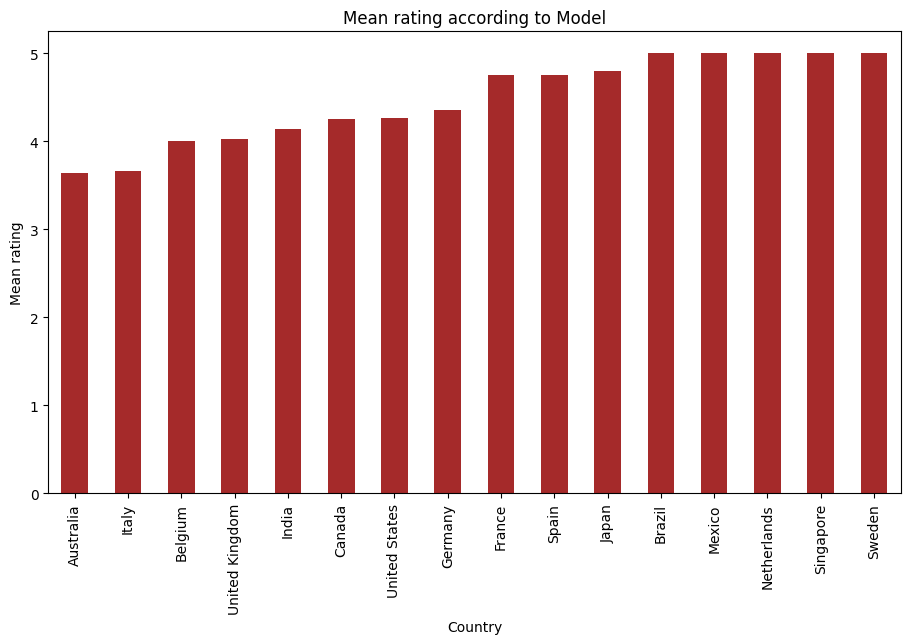

In [122]:
all_core.groupby('country')['ratingScore'].mean().sort_values().plot.bar(color = 'brown', figsize=(11, 6))
plt.title("Mean rating according to Model")
plt.xlabel('Country')
plt.ylabel('Mean rating')
plt.show()

# Sentiment Analysis

Above we have performed the Exploratory data analysis of available datasets. Going ahead we are going to use only one of the datasets, which is, all_core.

First we will train our models to perform sentiment analysis and then apply it onto our intel dataset to get sentiments out of each of the reviews.

In [123]:
# In the code below,
# Replace any non alphabet characters with a space
# Covert to lower case and split into words
# Iterate over the individual words and if it is not a stopword then add the stemmed form of the word to the corpus
corpus = []
stemmer = PorterStemmer()
for i in range(0, all_core.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ', all_core.iloc[i]['reviewDescription'])
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
  all_core.iloc[i]['reviewDescription'] = ' '.join(review)
  corpus.append(review)

C:\Users\ashut\AppData\Local\Temp\ipykernel_22236\4179697368.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_core.iloc[i]['reviewDescription'] = ' '.join(review)


In [124]:
all_core.head()

country  ratingScore                                  reviewDescription   
0   India            1  Cpu stock cooler fan got broken with 1 blade i...  \
1   India            1  The Processor is Good & Works Fine. But The De...   
2   India            4                                Performance is good   
3   India            5  If you would be building pc just for gaming an...   
4   India            5  This is one of the best cpu in budget if you o...   

                                         reviewTitle        Model Core  
0                                cpu with broken fan  i3 12th Gen   i3  
1                        Good Cpu but awful Delivery  i3 12th Gen   i3  
2                                               Good  i3 12th Gen   i3  
3  This is the best you'll get in this price rang...  i3 12th Gen   i3  
4                                            Awesome  i3 12th Gen   i3

In [125]:
#RoBERTa
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [126]:
#RoBERTa Model Download
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

c:\Users\ashut\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [127]:
#Sentiment Prediction
review_list=all_core['reviewDescription'].tolist()
predictions_rb=[]
for i in range(len(review_list)):
  try:
    encoding=tokenizer(review_list[i],return_tensors='pt')
    output = model(**encoding)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
      'neg' : scores[0],
      'neu' : scores[1],
      'pos' : scores[2]
    }
    if(scores_dict['neg']>scores_dict['neu'] and scores_dict['neg']>scores_dict['pos']):
      predictions_rb.append('negative')
    elif(scores_dict['pos']>scores_dict['neg'] and scores_dict['pos']>scores_dict['neu']):
      predictions_rb.append('positive')
    elif(scores_dict['neu']>scores_dict['pos'] and scores_dict['neu']>scores_dict['neg']):
      predictions_rb.append('neutral')
  except RuntimeError:
    print(f'Broke for row {i}')
    if(all_core.iloc[i]['ratingScore']==5 or all_core.iloc[i]['ratingScore']==4):
      predictions_rb.append('positive')
    elif(all_core.iloc[i]['ratingScore']==3):
      predictions_rb.append('neutral')
    elif(all_core.iloc[i]['ratingScore']==2 or all_core.iloc[i]['ratingScore']==1 or all_core.iloc[i]['ratingScore']==0):
      predictions_rb.append('negative')

Broke for row 94
Broke for row 288
Broke for row 299
Broke for row 300
Broke for row 471
Broke for row 495
Broke for row 497
Broke for row 515


In [128]:
all_core['Sentiments']=predictions_rb

In [129]:
all_core.head()

country  ratingScore                                  reviewDescription   
0   India            1  Cpu stock cooler fan got broken with 1 blade i...  \
1   India            1  The Processor is Good & Works Fine. But The De...   
2   India            4                                Performance is good   
3   India            5  If you would be building pc just for gaming an...   
4   India            5  This is one of the best cpu in budget if you o...   

                                         reviewTitle        Model Core   
0                                cpu with broken fan  i3 12th Gen   i3  \
1                        Good Cpu but awful Delivery  i3 12th Gen   i3   
2                                               Good  i3 12th Gen   i3   
3  This is the best you'll get in this price rang...  i3 12th Gen   i3   
4                                            Awesome  i3 12th Gen   i3   

  Sentiments  
0   negative  
1    neutral  
2   positive  
3   positive  
4   positive

### Visualisation Of Sentiments Across Processors

In [130]:
comments_database_i3_12 = all_core[((all_core['Sentiments'] == 'neutral') | (all_core['Sentiments'] == 'negative')) & (all_core["Model"] == 'i3 12th Gen')]
comments_database_i3_13 = all_core[((all_core['Sentiments'] == 'neutral') | (all_core['Sentiments'] == 'negative')) & (all_core["Model"] == 'i3 13th Gen')]
comments_database_i3_14 = all_core[((all_core['Sentiments'] == 'neutral') | (all_core['Sentiments'] == 'negative')) & (all_core["Model"] == 'i3 14th Gen')]

comments_database_i5_12 = all_core[((all_core['Sentiments'] == 'neutral') | (all_core['Sentiments'] == 'negative')) & (all_core["Model"] == 'i5 12th Gen')]
comments_database_i5_13 = all_core[((all_core['Sentiments'] == 'neutral') | (all_core['Sentiments'] == 'negative')) & (all_core["Model"] == 'i5 13th Gen')]
comments_database_i5_14 = all_core[((all_core['Sentiments'] == 'neutral') | (all_core['Sentiments'] == 'negative')) & (all_core["Model"] == 'i5 14th Gen')]

comments_database_i7_12 = all_core[((all_core['Sentiments'] == 'neutral') | (all_core['Sentiments'] == 'negative')) & (all_core["Model"] == 'i7 12th Gen')]
comments_database_i7_13 = all_core[((all_core['Sentiments'] == 'neutral') | (all_core['Sentiments'] == 'negative')) & (all_core["Model"] == 'i7 13th Gen')]
comments_database_i7_14 = all_core[((all_core['Sentiments'] == 'neutral') | (all_core['Sentiments'] == 'negative')) & (all_core["Model"] == 'i7 14th Gen')]

comments_database_i9_12 = all_core[((all_core['Sentiments'] == 'neutral') | (all_core['Sentiments'] == 'negative')) & (all_core["Model"] == 'i9 12th Gen')]
comments_database_i9_13 = all_core[((all_core['Sentiments'] == 'neutral') | (all_core['Sentiments'] == 'negative')) & (all_core["Model"] == 'i9 13th Gen')]
comments_database_i9_14 = all_core[((all_core['Sentiments'] == 'neutral') | (all_core['Sentiments'] == 'negative')) & (all_core["Model"] == 'i9 14th Gen')]

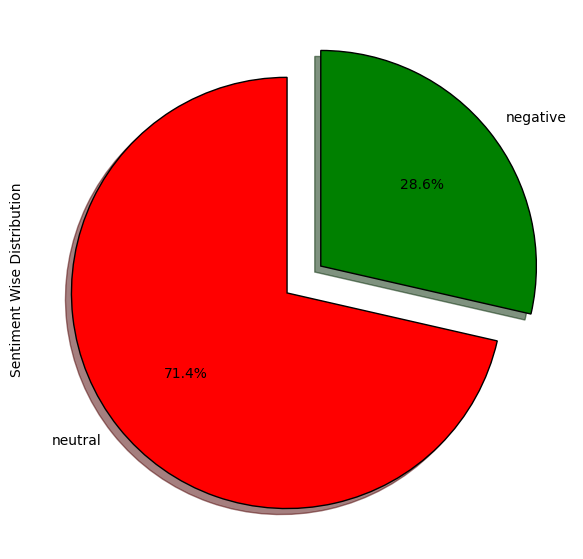

In [155]:
#Graphical representation of percentage data
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green')
wp = {'linewidth':1, "edgecolor":'black'}
tags = comments_database_i3_12['Sentiments'].value_counts()/comments_database_i3_12.shape[0]
explode=(0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Sentiment Wise Distribution')
from io import  BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")

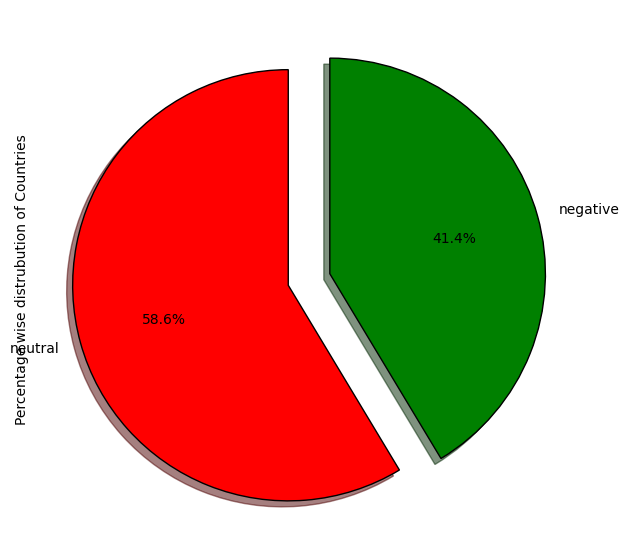

In [132]:
#Graphical representation of percentage data
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green')
wp = {'linewidth':1, "edgecolor":'black'}
tags = comments_database_i5_12['Sentiments'].value_counts()/comments_database_i5_12.shape[0]
explode=(0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of Countries')
from io import  BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")

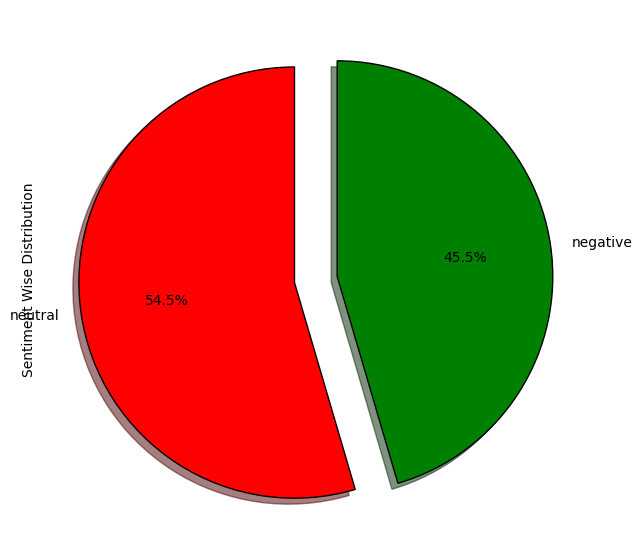

In [156]:
#Graphical representation of percentage data
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green')
wp = {'linewidth':1, "edgecolor":'black'}
tags = comments_database_i5_13['Sentiments'].value_counts()/comments_database_i5_13.shape[0]
explode=(0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Sentiment Wise Distribution')
from io import  BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")

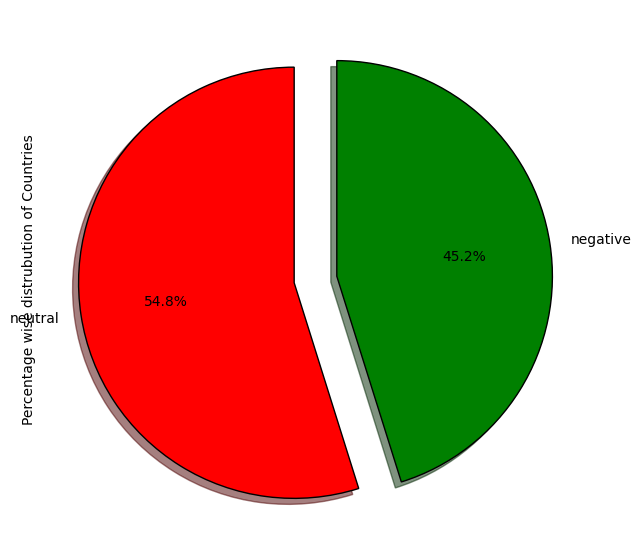

In [134]:
#Graphical representation of percentage data
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green')
wp = {'linewidth':1, "edgecolor":'black'}
tags = comments_database_i7_13['Sentiments'].value_counts()/comments_database_i7_13.shape[0]
explode=(0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of Countries')
from io import  BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")

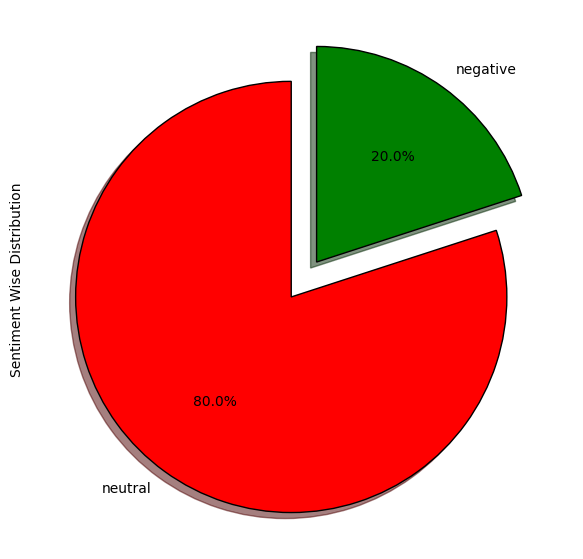

In [157]:
#Graphical representation of percentage data
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green')
wp = {'linewidth':1, "edgecolor":'black'}
tags = comments_database_i7_14['Sentiments'].value_counts()/comments_database_i7_14.shape[0]
explode=(0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Sentiment Wise Distribution')
from io import  BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")

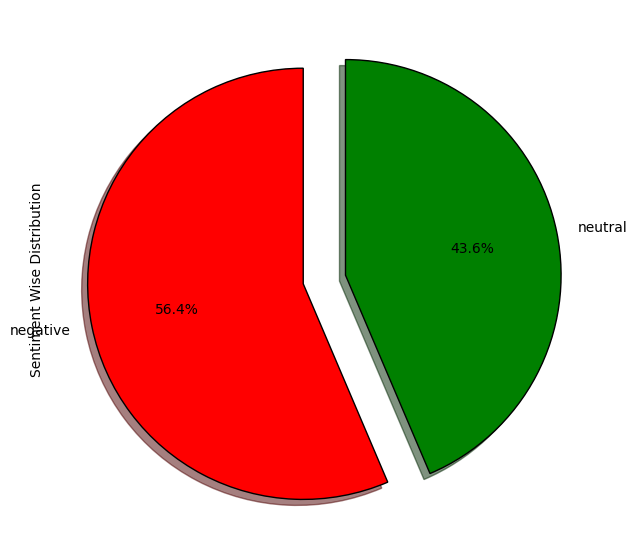

In [158]:
#Graphical representation of percentage data
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green')
wp = {'linewidth':1, "edgecolor":'black'}
tags = comments_database_i9_12['Sentiments'].value_counts()/comments_database_i9_12.shape[0]
explode=(0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Sentiment Wise Distribution')
from io import  BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")

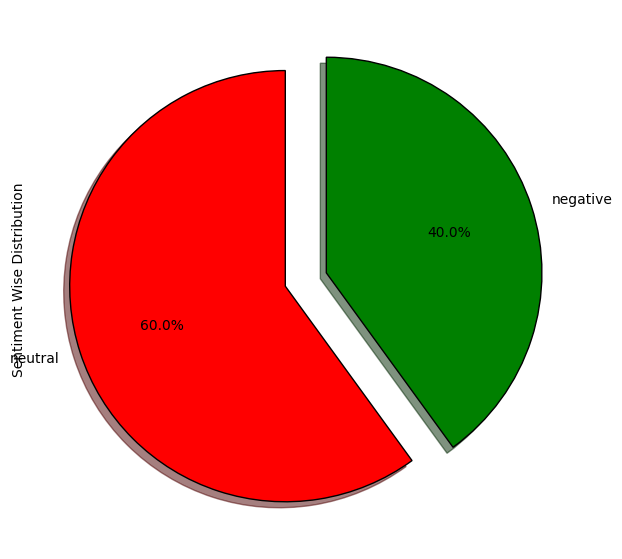

In [159]:
#Graphical representation of percentage data
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green')
wp = {'linewidth':1, "edgecolor":'black'}
tags = comments_database_i9_13['Sentiments'].value_counts()/comments_database_i9_13.shape[0]
explode=(0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Sentiment Wise Distribution')
from io import  BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")

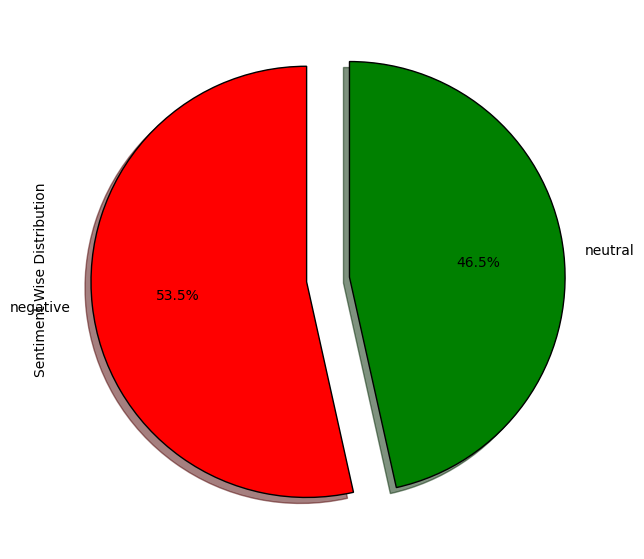

In [160]:
#Graphical representation of percentage data
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green')
wp = {'linewidth':1, "edgecolor":'black'}
tags = comments_database_i9_14['Sentiments'].value_counts()/comments_database_i9_14.shape[0]
explode=(0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Sentiment Wise Distribution')
from io import  BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")

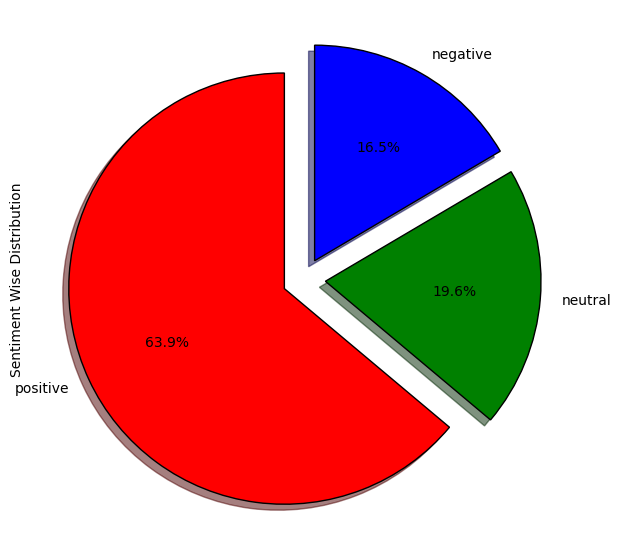

In [161]:
#Graphical representation of percentage data
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green','blue')
wp = {'linewidth':1, "edgecolor":'black'}
tags = all_core['Sentiments'].value_counts()/all_core.shape[0]
explode=(0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Sentiment Wise Distribution')
from io import  BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")

### Grievances and Issues with Processors Over the Years

In [140]:
paragraph_i3_12=""
paragraph_i3_13=""
paragraph_i3_14=""

paragraph_i5_12=""
paragraph_i5_13=""
paragraph_i5_14=""

paragraph_i7_12=""
paragraph_i7_13=""
paragraph_i7_14=""

paragraph_i9_12=""
paragraph_i9_13=""
paragraph_i9_14=""

for i in range(len(comments_database_i3_12)):
    paragraph_i3_12=paragraph_i3_12+comments_database_i3_12.iloc[i]["reviewDescription"]
    
for i in range(len(comments_database_i3_13)):
    paragraph_i3_13=paragraph_i3_13+comments_database_i3_13.iloc[i]["reviewDescription"]

for i in range(len(comments_database_i3_14)):
    paragraph_i3_14=paragraph_i3_14+comments_database_i3_14.iloc[i]["reviewDescription"]

 
    
for i in range(len(comments_database_i5_12)):
    paragraph_i5_12=paragraph_i5_12+comments_database_i5_12.iloc[i]["reviewDescription"]
    
for i in range(len(comments_database_i5_13)):
    paragraph_i5_13=paragraph_i5_13+comments_database_i5_13.iloc[i]["reviewDescription"]

for i in range(len(comments_database_i3_14)):
    paragraph_i5_14=paragraph_i5_14+comments_database_i5_14.iloc[i]["reviewDescription"]

 
    
for i in range(len(comments_database_i7_12)):
    paragraph_i7_12=paragraph_i7_12+comments_database_i7_12.iloc[i]["reviewDescription"]
    
for i in range(len(comments_database_i7_13)):
    paragraph_i7_13=paragraph_i7_13+comments_database_i7_13.iloc[i]["reviewDescription"]

for i in range(len(comments_database_i7_14)):
    paragraph_i7_14=paragraph_i7_14+comments_database_i7_14.iloc[i]["reviewDescription"]



for i in range(len(comments_database_i9_12)):
    paragraph_i9_12=paragraph_i9_12+comments_database_i9_12.iloc[i]["reviewDescription"]
    
for i in range(len(comments_database_i9_13)):
    paragraph_i9_13=paragraph_i9_13+comments_database_i9_13.iloc[i]["reviewDescription"]

for i in range(len(comments_database_i9_14)):
    paragraph_i7_14=paragraph_i7_14+comments_database_i9_14.iloc[i]["reviewDescription"]



In [141]:
# import google.generativeai as genai
# import os

# genai.configure(api_key="")

# model = genai.GenerativeModel('gemini-1.5-flash')

In [142]:
#Greiviances associated to i3 Gen 12
response_i3_12 = model.generate_content(f"In the following text, I am giving you reviews on intel processors,\n{paragraph_i3_12}\n What I want you is to find all the item/product issues and complaints users have with this processor in the text provided and return a compiled version, in form of pointers, all the greivances found. Note do not return amazon related issues")

In [143]:
print(response_i3_12.text)

Here are the issues users have with the Intel processor, excluding Amazon-related complaints:

* **Stock Cooler Issues:**
    * **Broken fan blade:** Multiple users reported receiving the stock cooler with a broken fan blade.
    * **Loud noise and vibration:** The stock cooler, even when not broken, generated significant noise and vibration, indicating poor cooling performance.
    * **High temperatures:** The stock cooler was ineffective in keeping the CPU cool, resulting in high temperatures.
* **Packaging Issues:**
    * **Used or damaged packaging:**  One user noted that the product appeared to have been used previously due to the packaging condition.
* **Warranty Issues:**
    * **Pre-used warranty:**  One user discovered that a significant portion of the 3-year warranty had already expired. This implies that the processor may have been previously owned. 



In [144]:
#Greiviances associated to i3 Gen 13
response_i3_13 = model.generate_content(f"In the following text, I am giving you reviews on intel processors,\n{paragraph_i3_13}\n What I want you is to find all the item/product issues and complaints users have with this processor in the text provided and return a compiled version, in form of pointers, all the greivances found. Note do not return amazon related issues")
print(response_i3_13.text)

Please provide me with the text containing the Intel processor reviews. I need the actual text to analyze it and identify the user complaints and issues. 



In [145]:
#Greiviances associated to i3 Gen 14
response_i3_14 = model.generate_content(f"In the following text, I am giving you reviews on intel processors,\n{paragraph_i3_14}\n What I want you is to find all the item/product issues and complaints users have with this processor in the text provided and return a compiled version, in form of pointers, all the greivances found. Note do not return amazon related issues")
print(response_i3_14.text)

Please provide the text with the Intel processor reviews so I can analyze it and extract the complaints and issues. I'm ready to help! 



In [146]:
#Greiviances associated to i5 Gen 12
response_i5_12 = model.generate_content(f"In the following text, I am giving you reviews on intel processors,\n{paragraph_i5_12}\n What I want you is to find all the item/product issues and complaints users have with this processor in the text provided and return a compiled version, in form of pointers, all the greivances found. Note do not return amazon related issues")
print(response_i5_12.text)

Here are the issues and complaints users have with the Intel processors, focusing on the product itself, not Amazon-related problems:

* **Faulty or Defective Units:**
    * Fan not working 
    * CPU pre-used and rattling in the box
    * Thermal paste smeared around the cooler and CPU
    * Broken fan blades on delivery
    * Processor stopped working after 4 months

* **Issues with Stock Cooler:**
    *  Loud and ineffective
    *  Overheats (reaching 90C and even 100C)
    *  Clips are unreliable and fragile, making proper mounting difficult
    *  Overall poor performance, leading to overheating even with proper installation

* **Other Complaints:**
    *  Overpriced (suggests buying for less than 15k)
    *  Requires a graphics card
    *  Does not specify which motherboards it is compatible with
    *  "Senza processore" (Italian for "without processor"), suggesting a missing CPU 



In [147]:
#Greiviances associated to i5 Gen 13
response_i5_13 = model.generate_content(f"In the following text, I am giving you reviews on intel processors,\n{paragraph_i5_13}\n What I want you is to find all the item/product issues and complaints users have with this processor in the text provided and return a compiled version, in form of pointers, all the greivances found. Note do not return amazon related issues")
print(response_i5_13.text)

Here are the user grievances related to the Intel Core i5-13600K processor, excluding Amazon-specific issues:

* **BSOD Errors:**  Multiple users reported consistent blue screen of death errors, even after reinstalling Windows.
* **Overheating Issues:**  Users found the processor to run hot under heavy loads, requiring robust cooling solutions to prevent thermal throttling.
* **CPU Failure:** One user reported the CPU failing within a year without overclocking, leading to system crashes and requiring a shop visit for diagnosis.
* **Incompatibility with Motherboards:** Some users experienced issues with compatibility with older motherboards, requiring a BIOS update or a different generation of CPU.
* **Open Box/Used Product:** One user received a product that appeared to be used and not as described, with missing stickers and residue from the heatsink. 
* **Performance Expectations:** One user reported that the upgrade from an i5-8900K to the i5-13600K didn't significantly improve perfo

In [148]:
#Greiviances associated to i5 Gen 14
response_i5_14 = model.generate_content(f"In the following text, I am giving you reviews on intel processors,\n{paragraph_i5_14}\n What I want you is to find all the item/product issues and complaints users have with this processor in the text provided and return a compiled version, in form of pointers, all the greivances found. Note do not return amazon related issues")
print(response_i5_14.text)

Please provide me with the text containing the Intel processor reviews. I need the actual text to extract the issues and complaints. Once you provide the text, I can analyze it and compile a list of grievances in a bulleted format. 



In [149]:
#Greiviances associated to i7 Gen 12
response_i7_12 = model.generate_content(f"In the following text, I am giving you reviews on intel processors,\n{paragraph_i7_12}\n What I want you is to find all the item/product issues and complaints users have with this processor in the text provided and return a compiled version, in form of pointers, all the greivances found. Note do not return amazon related issues")
print(response_i7_12.text)

Here are the grievances found in the text, focusing on the Intel processor itself:

* **High-end Intel processors require good cooling:** The reviewer explicitly states that you need a good cooler, like the Noctua D15, to adequately cool high-end Intel processors. 
* **Cooling Costs Extra:** The reviewer emphasizes that the cost of a good cooler needs to be factored into the overall price of an Intel high-end processor, adding €100 to the purchase price. 



In [150]:
#Greiviances associated to i7 Gen 13
response_i7_13 = model.generate_content(f"In the following text, I am giving you reviews on intel processors,\n{paragraph_i7_13}\n What I want you is to find all the item/product issues and complaints users have with this processor in the text provided and return a compiled version, in form of pointers, all the greivances found. Note do not return amazon related issues")
print(response_i7_13.text)

Here are the item/product issues and complaints users have with Intel processors, compiled from the provided text:

* **Used/Refurbished Products Misrepresented as New:**
    *  A user received a CPU in an Intel box, but the plastic holder was loose and the CPU itself had signs of use (scratches, thermal paste residue), leading them to believe it was a returned product sold as new.
    * Another user received a CPU in an unsealed box, confirming that it was used.
    * A user received a CPU box with the seal broken and no CPU inside.

* **Defective CPUs:**
    * One user experienced a complete CPU failure after a year of use. 
    * Another user had a CPU that was immediately detected as faulty by their motherboard.
    * A user hired someone to install their CPU, but it did not work at all.

* **Quality Control Issues:**
    * The user experiencing the CPU failure after a year expressed disappointment in Intel's quality control.
    * The user whose CPU was immediately recognized as f

In [151]:
#Greiviances associated to i7 Gen 14
response_i7_14 = model.generate_content(f"In the following text, I am giving you reviews on intel processors,\n{paragraph_i7_14}\n What I want you is to find all the item/product issues and complaints users have with this processor in the text provided and return a compiled version, in form of pointers, all the greivances found. Note do not return amazon related issues")
print(response_i7_14.text)

Here are the user grievances and product issues found in the text regarding Intel processors, excluding Amazon-specific issues:

* **High Temperatures and Thermal Throttling:** 
    *  Users report extremely high temperatures even with liquid cooling, often reaching 90-100°C.
    *  This leads to thermal throttling, affecting performance and causing game stutters.
    *  The new LGA 1700 socket design is blamed for the increased heat.
    *  Even idle temps fluctuate wildly, indicating a potential problem with the design.
* **Memory Stability Issues:**
    *  Users report difficulties achieving advertised RAM speeds (e.g., 6800 MHz) with the 14700K. 
    *  Some users with previous 13600KF chips had no issues with high RAM speeds.
* **Stability Issues and Crashes:**
    *  Many users report system instability, random crashes, and blue screens of death (BSOD).
    *  These issues are attributed to the CPU's high default clock speeds and voltage.
    *  Some users even experienced crashe

In [152]:
#Greiviances associated to i9 Gen 12
response_i9_12 = model.generate_content(f"In the following text, I am giving you reviews on intel processors,\n{paragraph_i9_12}\n What I want you is to find all the item/product issues and complaints users have with this processor in the text provided and return a compiled version, in form of pointers, all the greivances found. Note do not return amazon related issues")
print(response_i9_12.text)

Here are the product issues and complaints users have with the Intel i9-12900k processor, excluding Amazon-related issues:

* **High Temperatures:**  Multiple users mention the processor runs hot, even with high-end cooling solutions.  Some find the temperatures concerning, particularly under heavy loads, while others accept it as expected behavior for an overclocked high-performance chip.
* **Overpriced:** Some users feel the processor was overpriced when they purchased it, especially considering its current price point. 
* **Value for performance:**  Several users believe the 12700k offers similar performance at a lower price point and recommend opting for it instead. 
* **RAM Compatibility:** Some users note that Alder Lake (the platform the 12900k is based on) has challenges with RAM clocking, making it more difficult to maximize system performance.
* **Power Consumption:** The processor is power-hungry, requiring a high-output power supply to handle its demands.
* **Integrated Gra

In [153]:
#Greiviances associated to i9 Gen 13
response_i9_13= model.generate_content(f"In the following text, I am giving you reviews on intel processors,\n{paragraph_i9_13}\n What I want you is to find all the item/product issues and complaints users have with this processor in the text provided and return a compiled version, in form of pointers, all the greivances found. Note do not return amazon related issues")
print(response_i9_13.text)

Here are the issues and complaints users have with the processor, based on the provided text:

* **Overheating:**  The processor runs hot, even with a high-quality cooler.  Users report temperatures reaching 80°C during demanding gaming sessions.
* **Thermal Throttling:** Despite a good cooler, some users experience thermal throttling, suggesting the processor's temperature is exceeding safe limits.
* **Dead on Arrival (DOA):** One user received a processor that was dead on arrival.
* **BIOS Tinkering:** Users found that the processor required significant BIOS tweaking to get the voltage and temperature under control.
* **Frequent Blue Screen of Death (BSOD):**  One user reported multiple BSODs, application crashes, and games closing unexpectedly.
* **Memory Issues:**  Another user experienced issues related to memory, with the system reporting missing memory and the inability to launch games.
* **Sudden Failure:**  One user reported that the processor worked fine for several months bu

In [154]:
#Greiviances associated to i9 Gen 14
response_i9_14= model.generate_content(f"In the following text, I am giving you reviews on intel processors,\n{paragraph_i9_14}\n What I want you is to find all the item/product issues and complaints users have with this processor in the text provided and return a compiled version, in form of pointers, all the greivances found. Note do not return amazon related issues")
print(response_i9_14.text)

Please provide the text with the Intel processor reviews. I need the actual text to identify the issues and complaints users have. 

